In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
data_train = pd.read_csv("./train.csv")

In [3]:
data_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data_train.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     91     1460        1460      1460  ...  1460.000000      7    281   
unique     2        4           4         2  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      50      925        1311      1459  ...          NaN      3    157   
mean     NaN      NaN         NaN       NaN  ...     2.758904    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    40.177307    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           54   1460.000000  1460.000000  1460.000000      1460   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            49           NaN          NaN          NaN      1267   
mean           NaN     43.489041     6.321918  2007.815753       NaN   
std            NaN    496.123024     2.703626     1.328095       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1460    1460.000000  
unique              6            NaN  
top            Normal            NaN  
freq             1198            NaN  
mean              NaN  180921.195890  
std               NaN   79442.502883  
min               NaN   34900.000000  
25%               NaN  129975.000000  
50%               NaN  163000.000000  
75%               NaN  214000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

For SalePrice, it is evident that house prices vary significantly, with an average price of around 180,000. There are also several extremely expensive outliers.

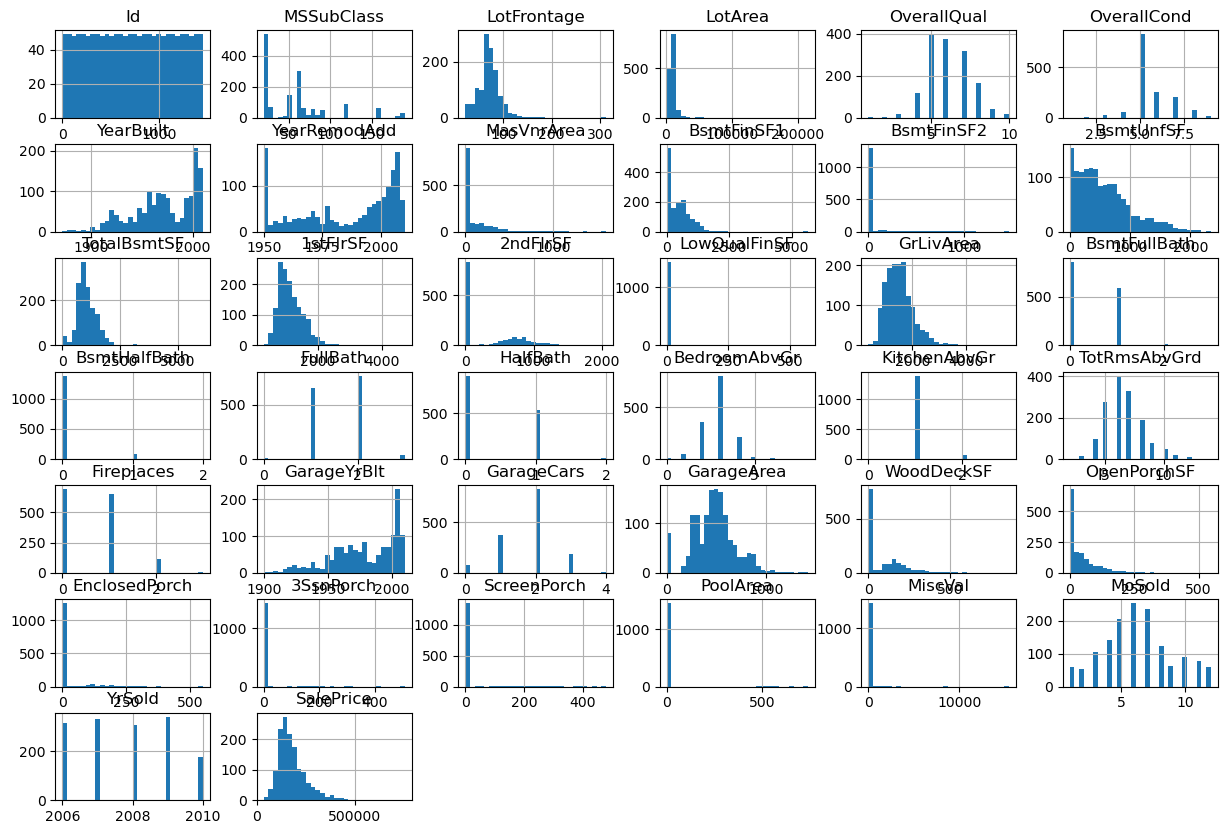

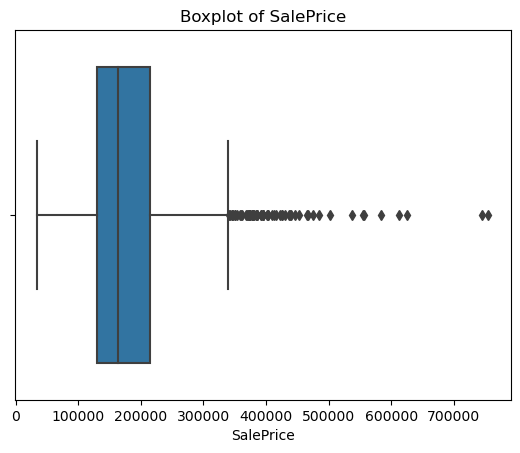

In [6]:
data_train.hist(bins=30, figsize=(15, 10))
plt.show()

sns.boxplot(x=data_train['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.show()

The boxplot reveals long whiskers and numerous points outside the whiskers, indicating the presence of very high-priced outliers. The median house price is around 170,000, but there are some houses priced significantly higher, above 400,000.

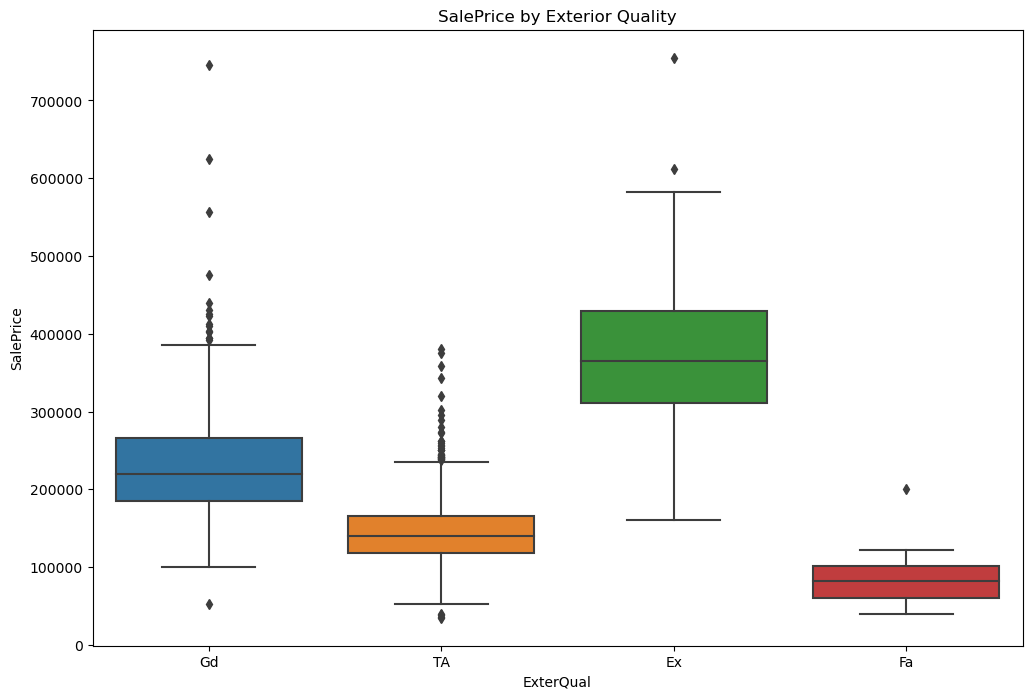

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='ExterQual', y='SalePrice', data=data_train)
plt.title('SalePrice by Exterior Quality')
plt.show()

The boxplot of SalePrice by ExteriorQuality shows that the category "Excellent" has a median house price significantly higher than the categories "Good" and "Fair." This suggests that houses with a higher exterior quality tend to have higher prices. 

The visual representation indicates a positive correlation between exterior quality and house price, with better-quality exteriors generally associated with more expensive properties.

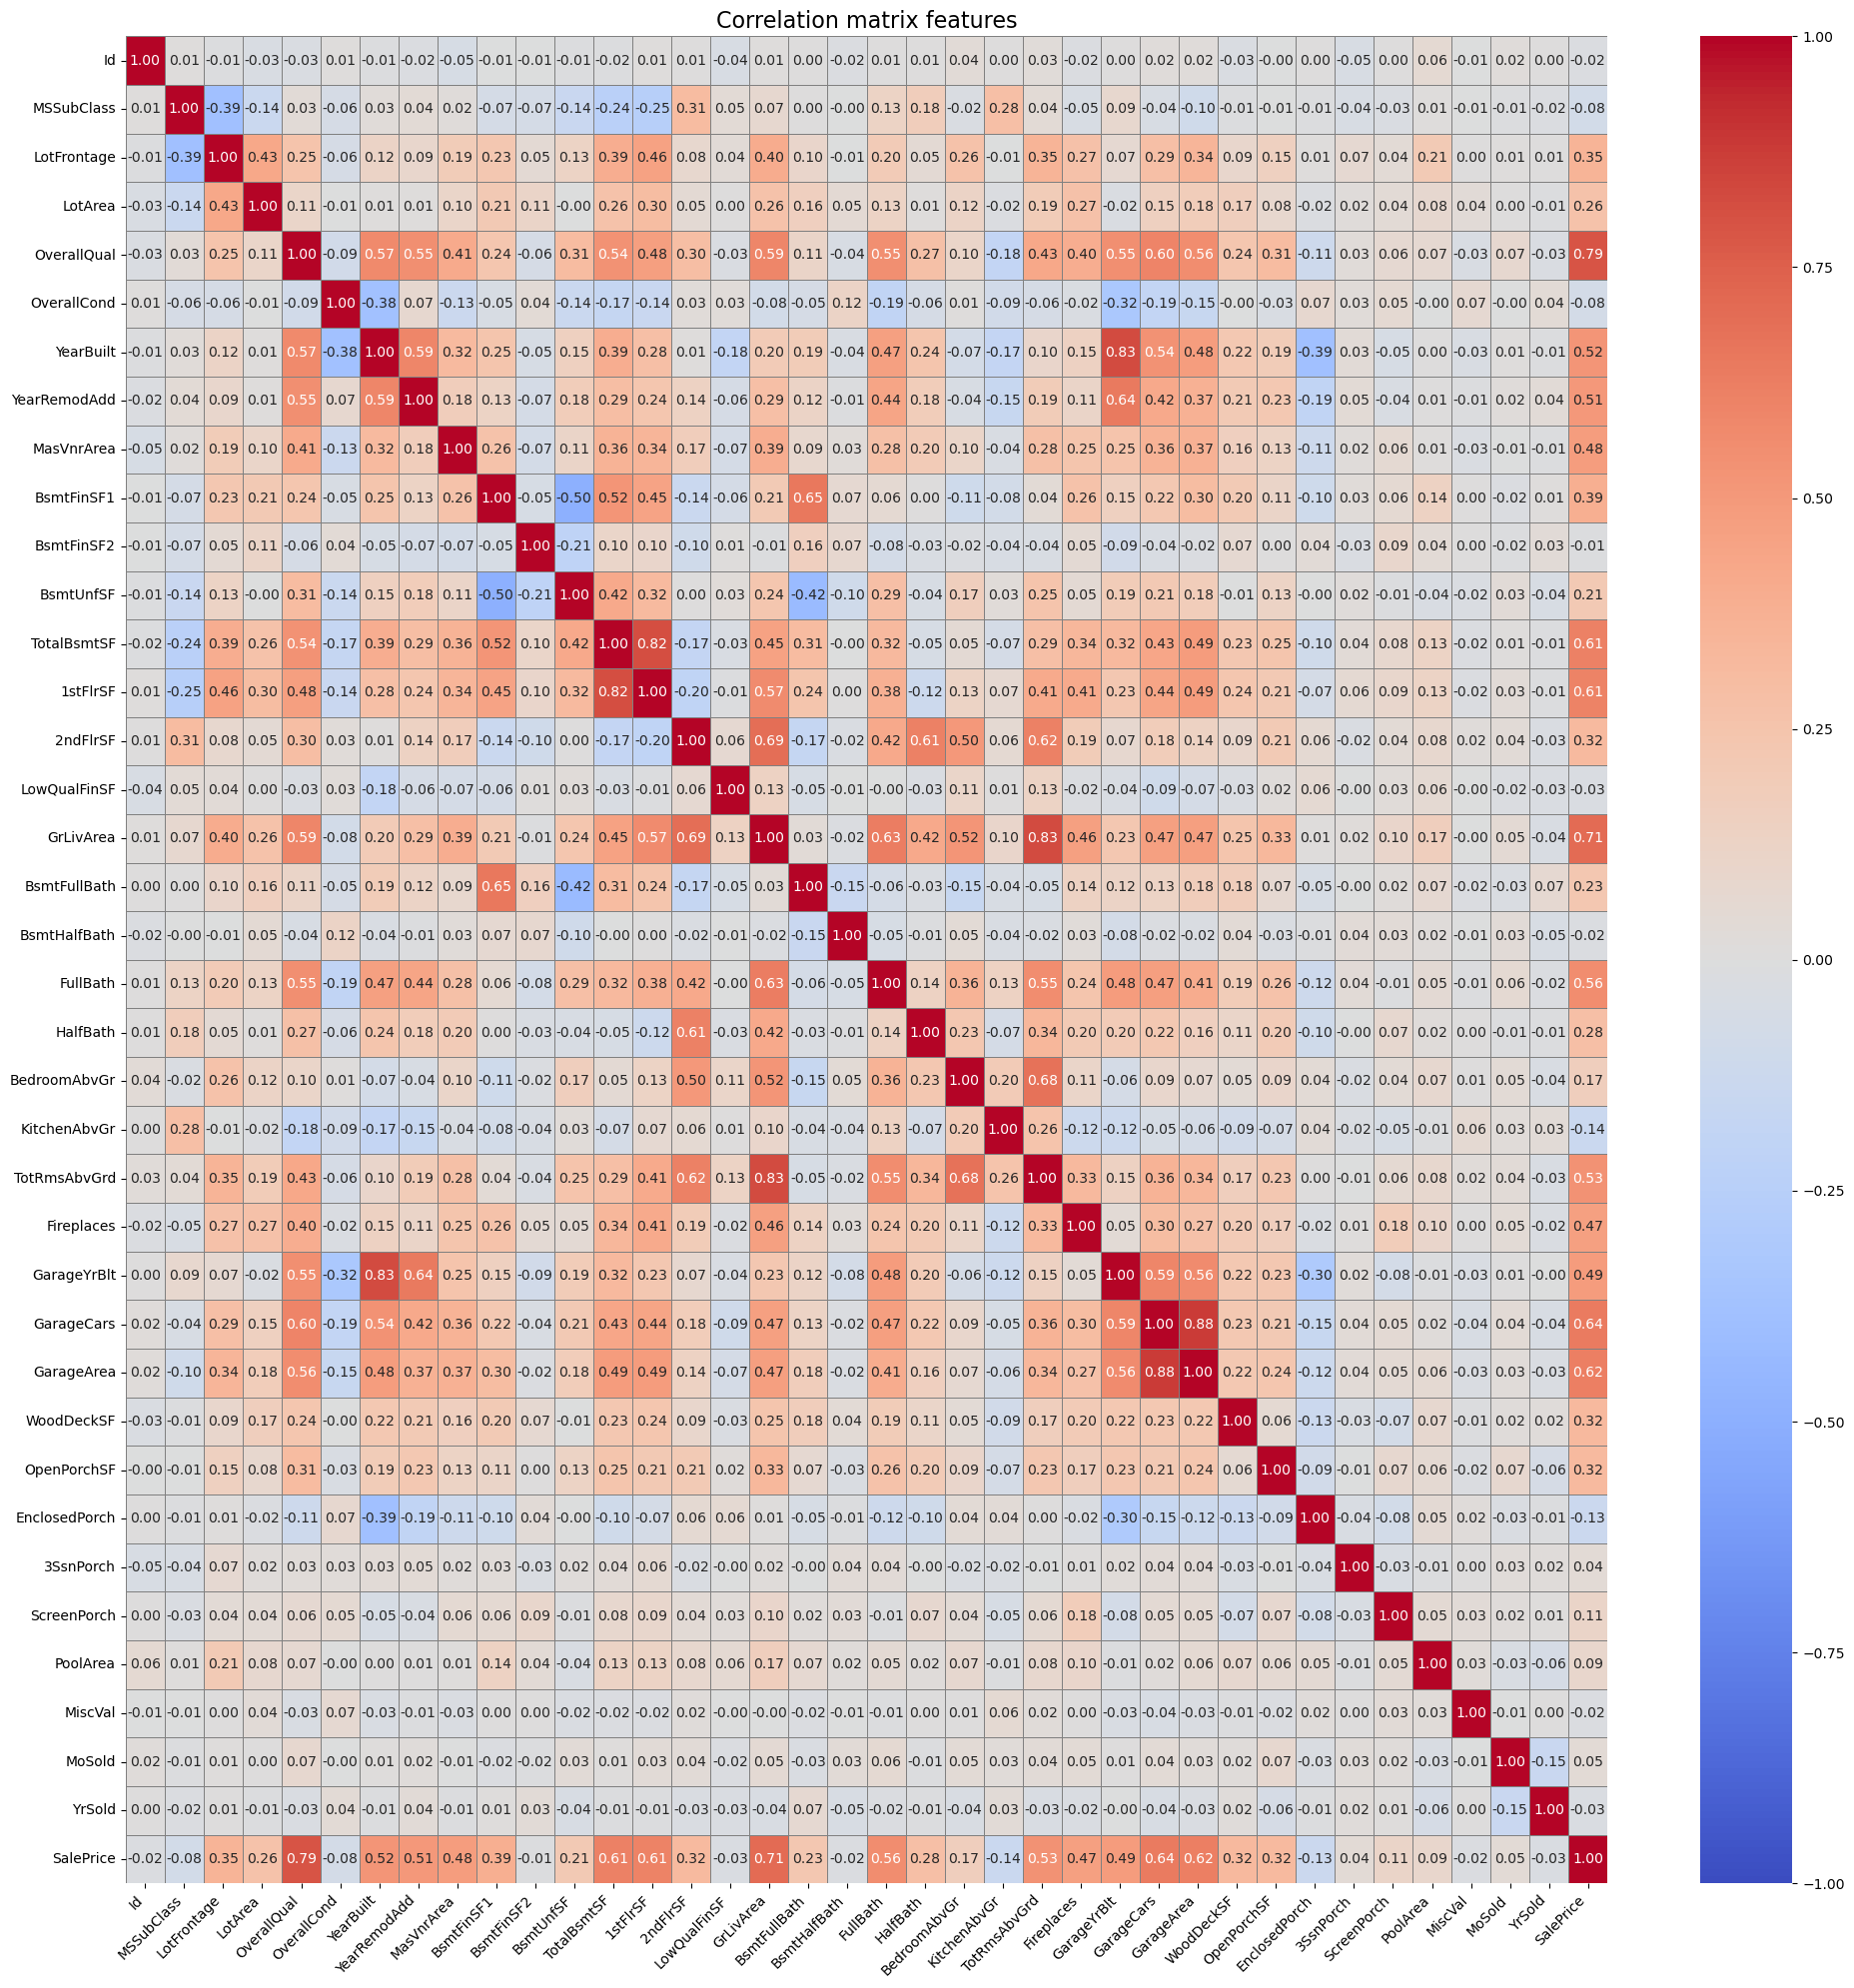

In [8]:
num_features = data_train.select_dtypes(include=['float64', 'int64']).columns
cat_features = data_train.select_dtypes(include=['object']).columns

corr_matrix = data_train[num_features].corr()

plt.figure(figsize=(20, 20)) 
heatmap = sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm',  
    vmin=-1, vmax=1,  
    linewidths=0.5,  
    linecolor='gray' 
)

plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(rotation=0, fontsize=10) 

plt.title('Correlation matrix features', fontsize=16)

plt.tight_layout()
plt.show()

Positive Correlation: OverallQual has a strong positive correlation of 0.79 with SalePrice. This indicates that the overall quality of a house is strongly related to its price. In other words, houses with higher overall quality tend to have higher prices.

Negative Correlation: KitchenAbvGr has a negative correlation of -0.14 with SalePrice. This suggests that houses with more kitchens above ground might tend to have lower prices. However, the correlation is relatively weak, indicating that the number of kitchens above ground has a minor impact on house prices.

# CATEGORICAL ANALYSIS

In [9]:
for feature in cat_features:
    print(f'Feature: {feature}')
    print(data_train[feature].value_counts())
    print()

Feature: MSZoning
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Feature: Street
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Feature: Alley
Alley
Grvl    50
Pave    41
Name: count, dtype: int64

Feature: LotShape
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

Feature: LandContour
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

Feature: Utilities
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

Feature: LotConfig
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

Feature: LandSlope
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

Feature: Neighborhood
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58


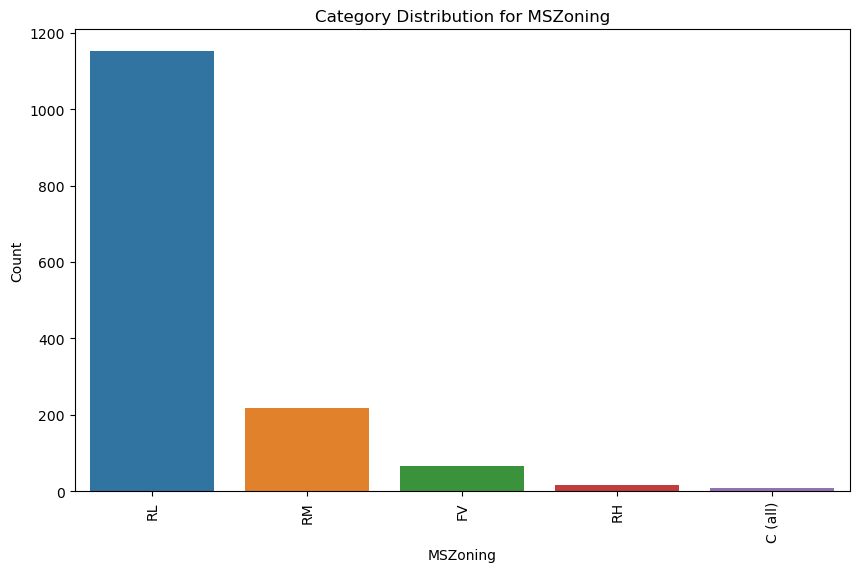

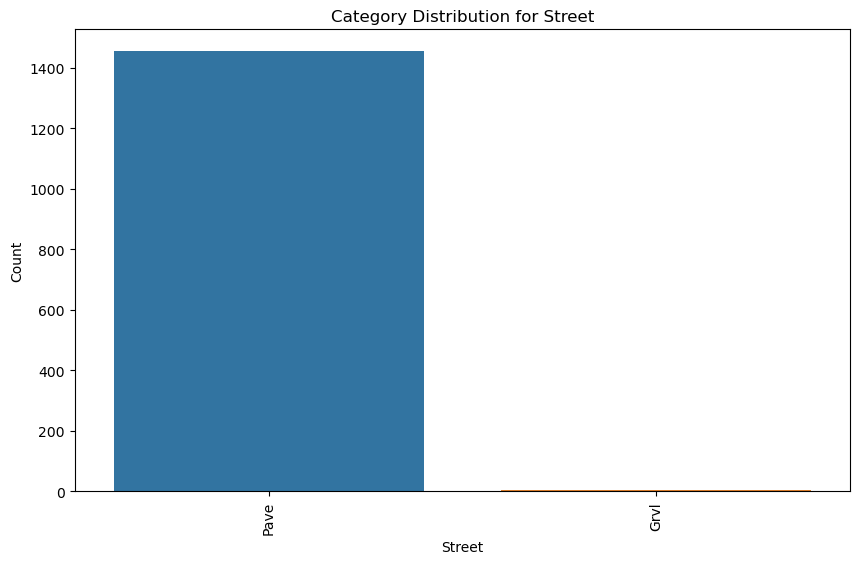

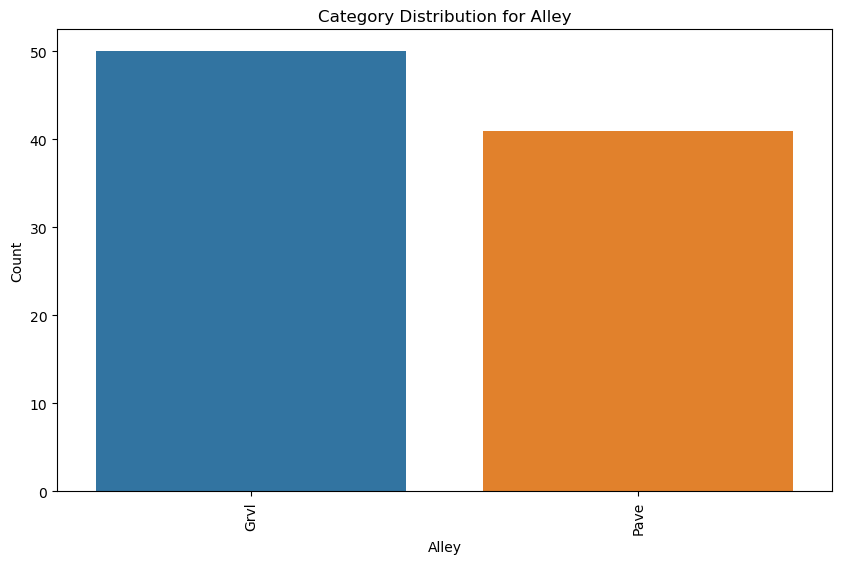

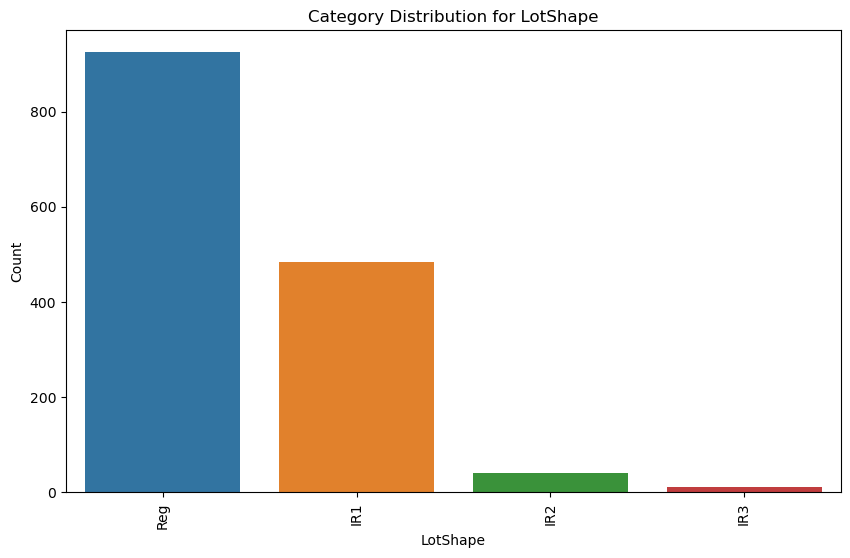

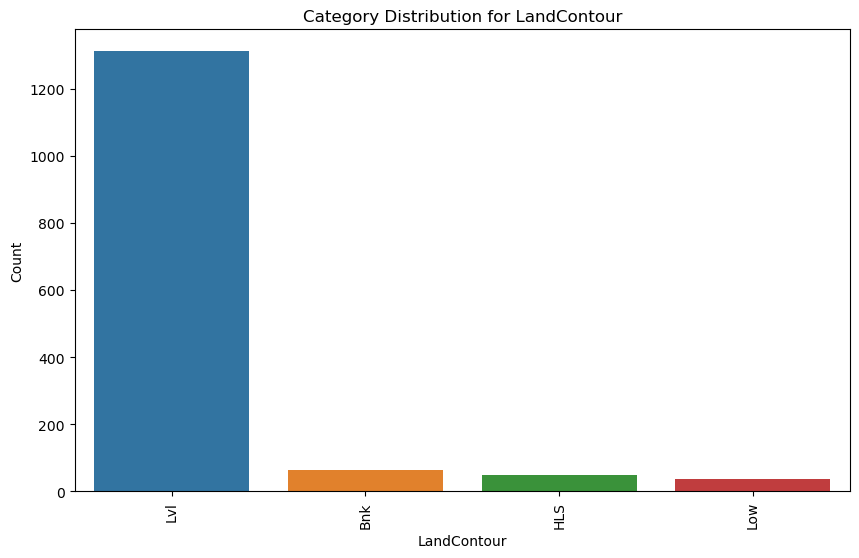

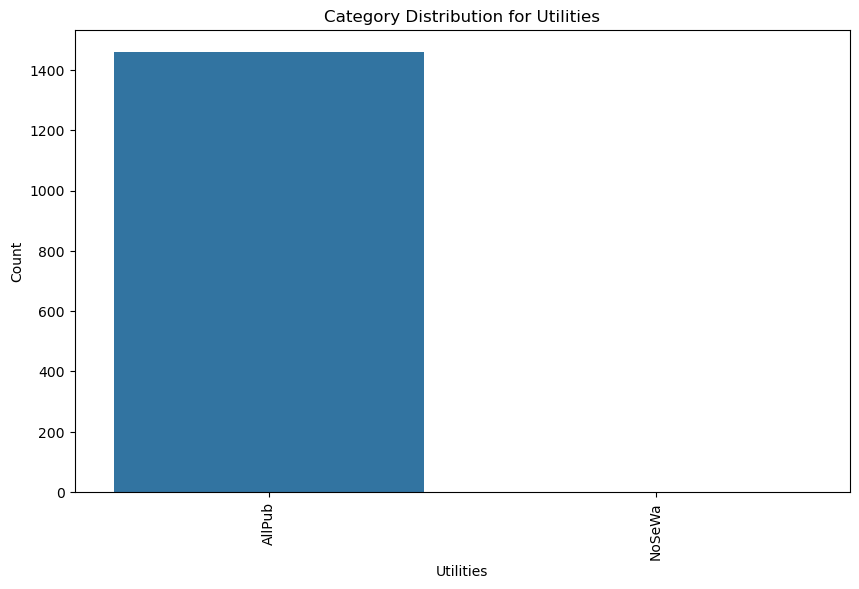

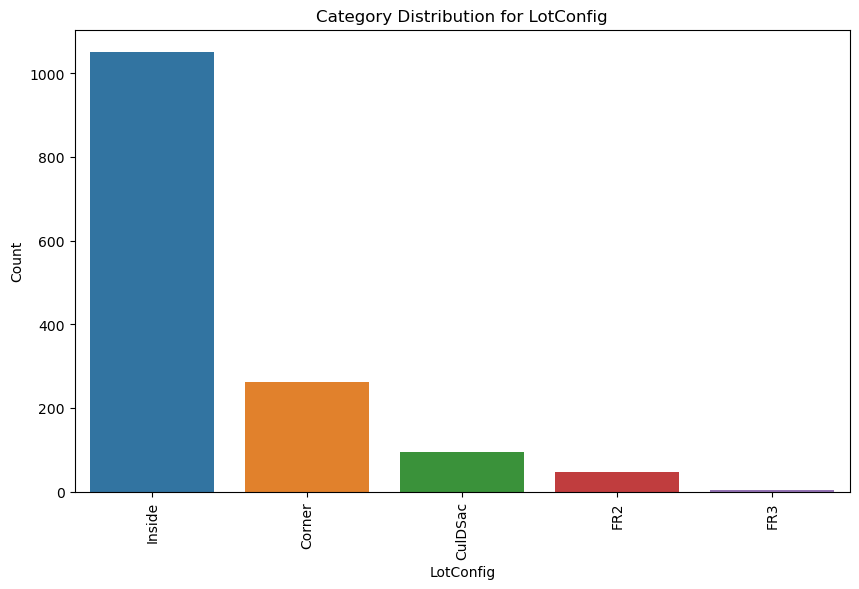

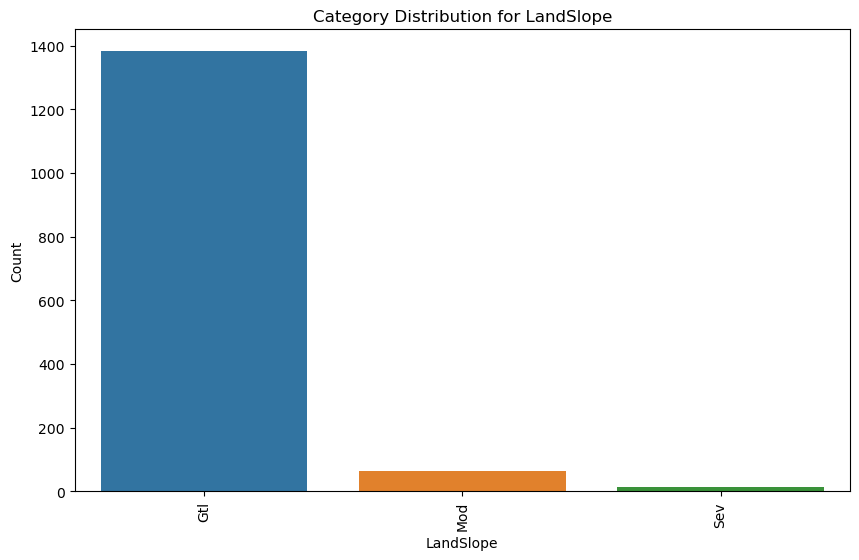

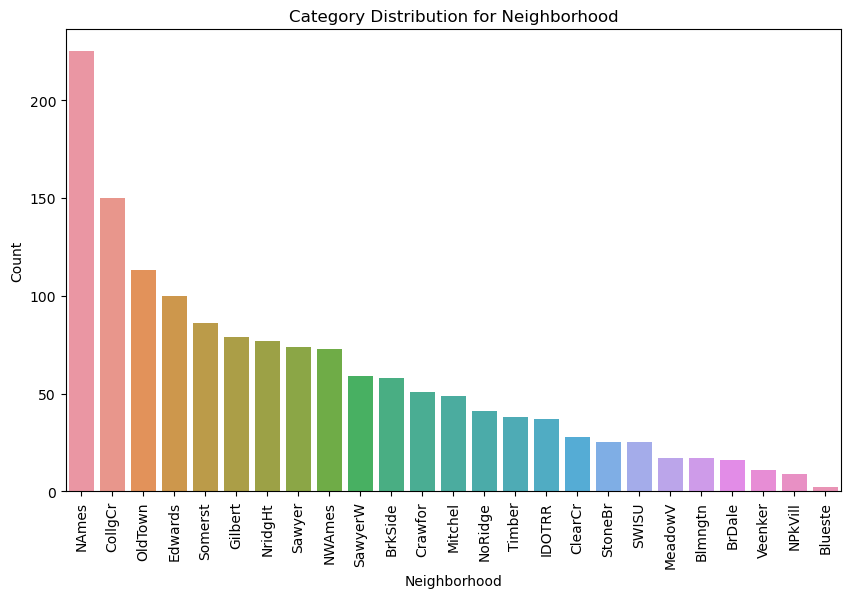

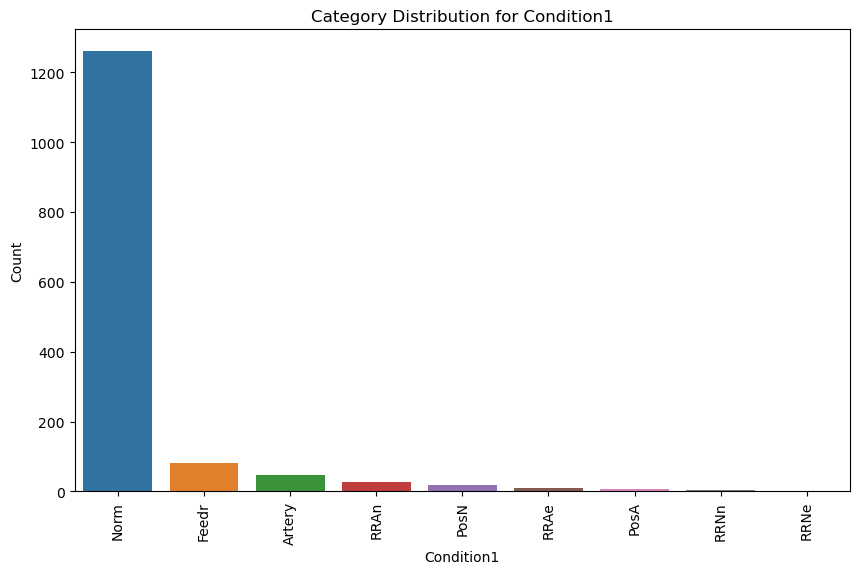

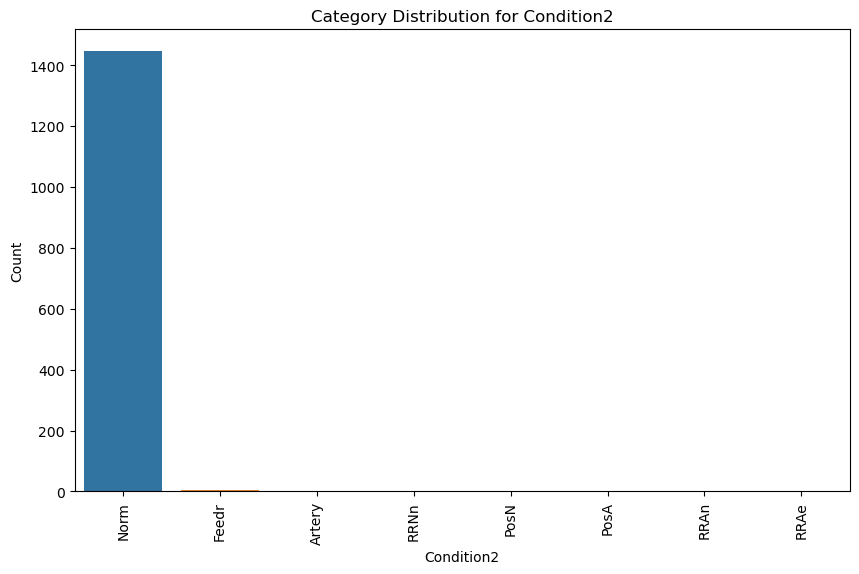

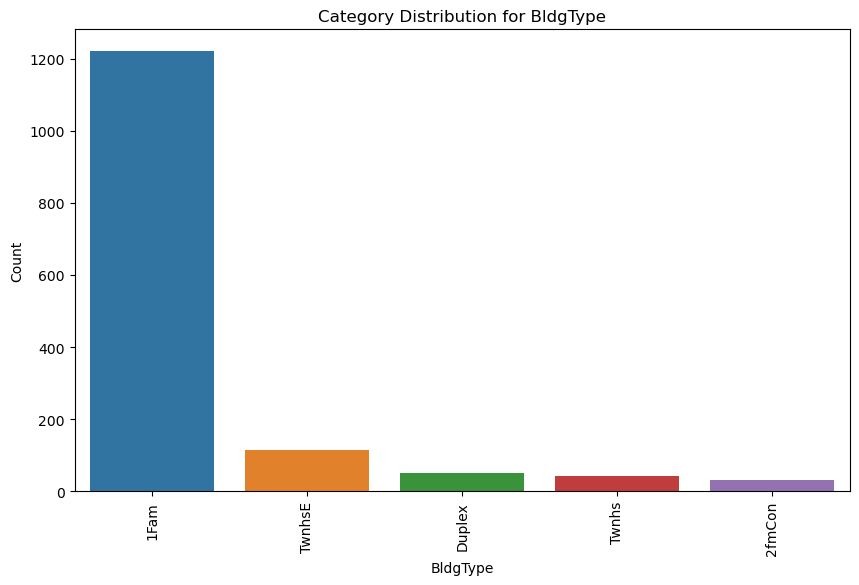

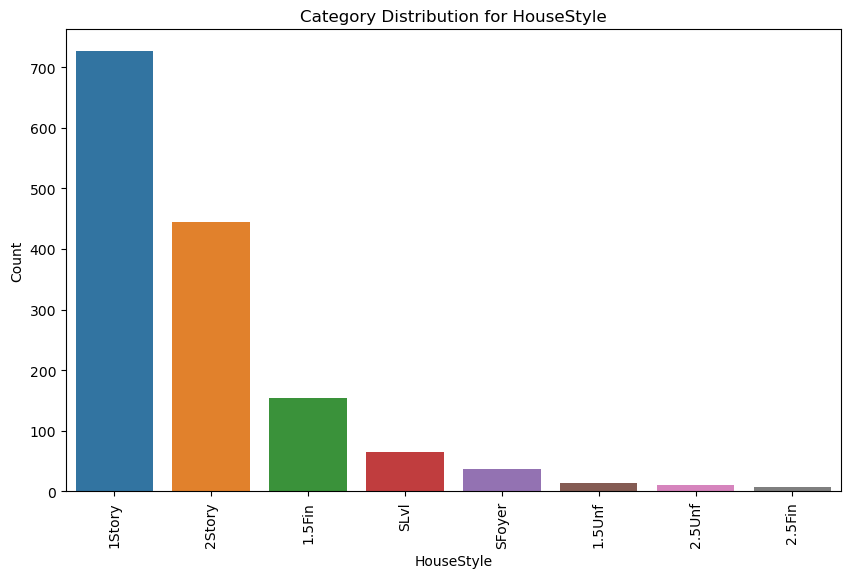

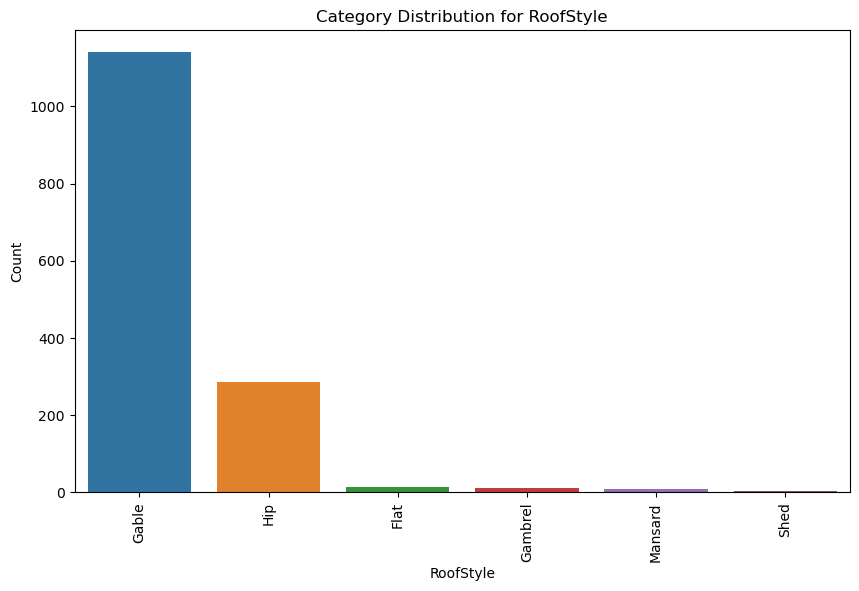

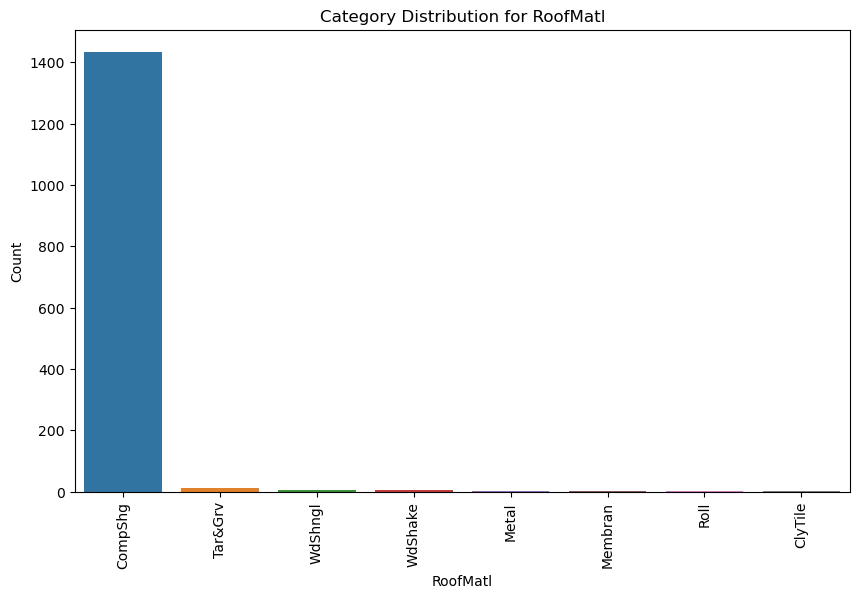

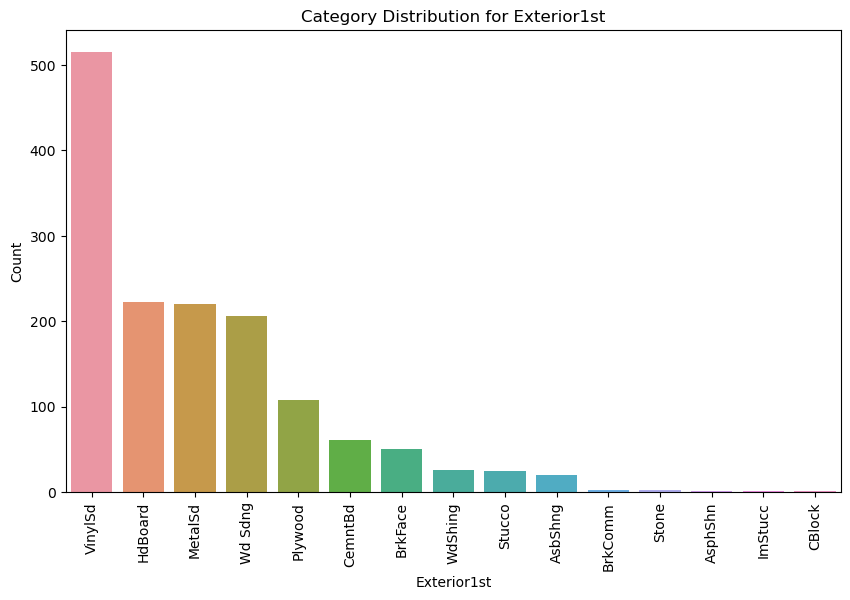

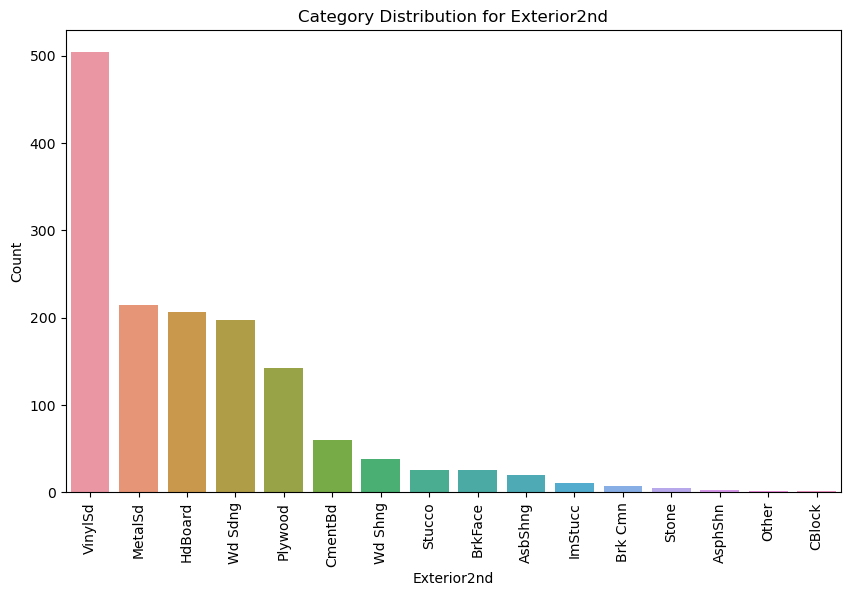

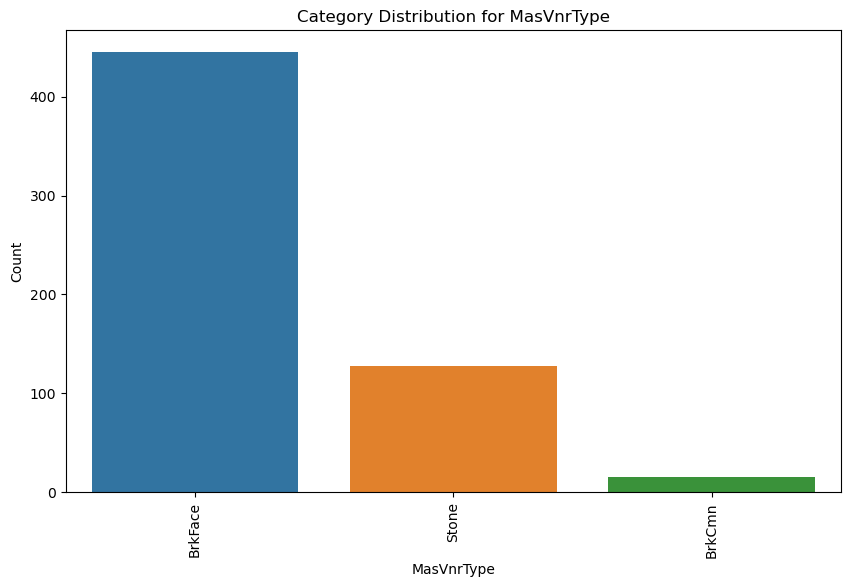

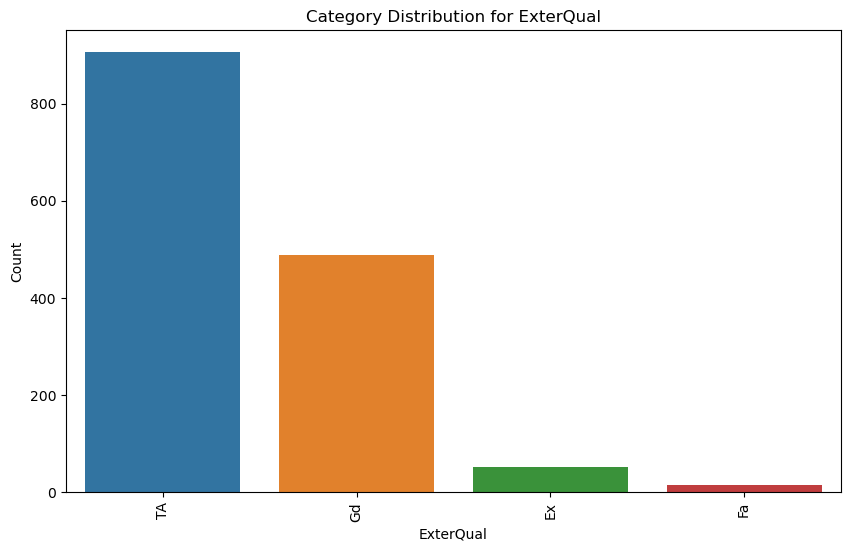

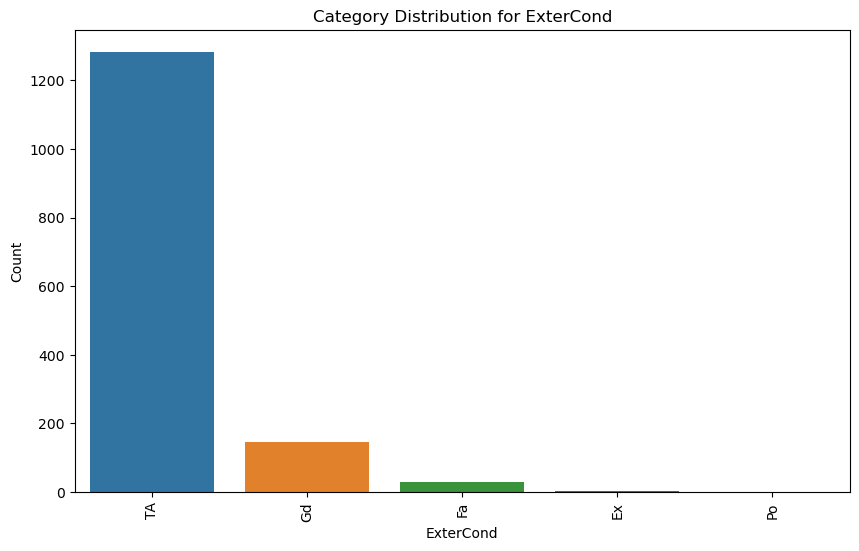

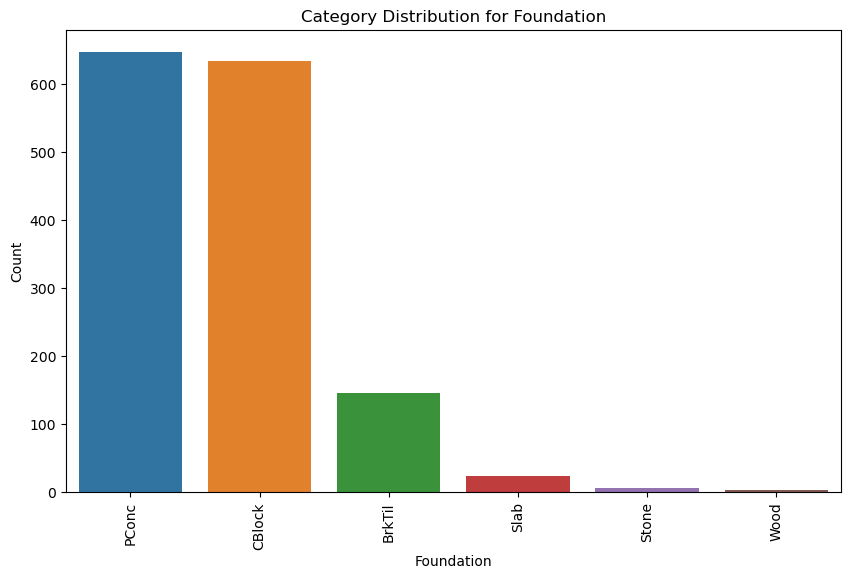

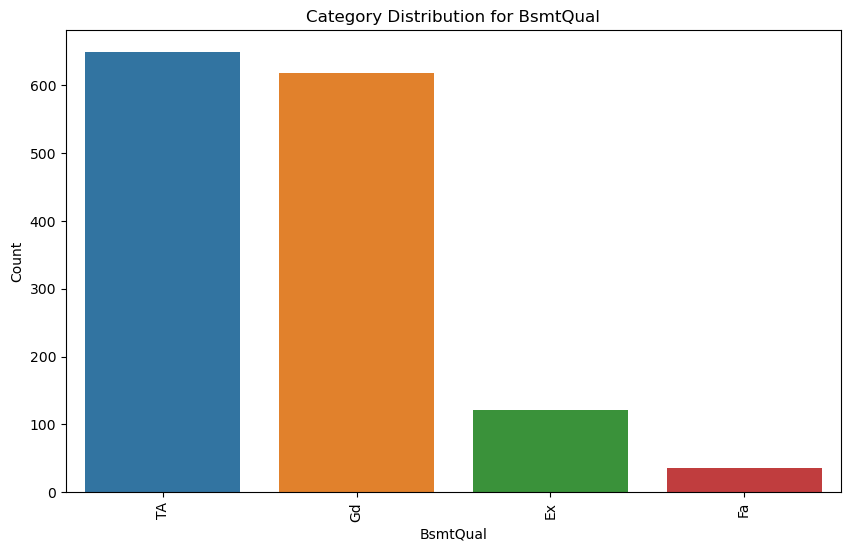

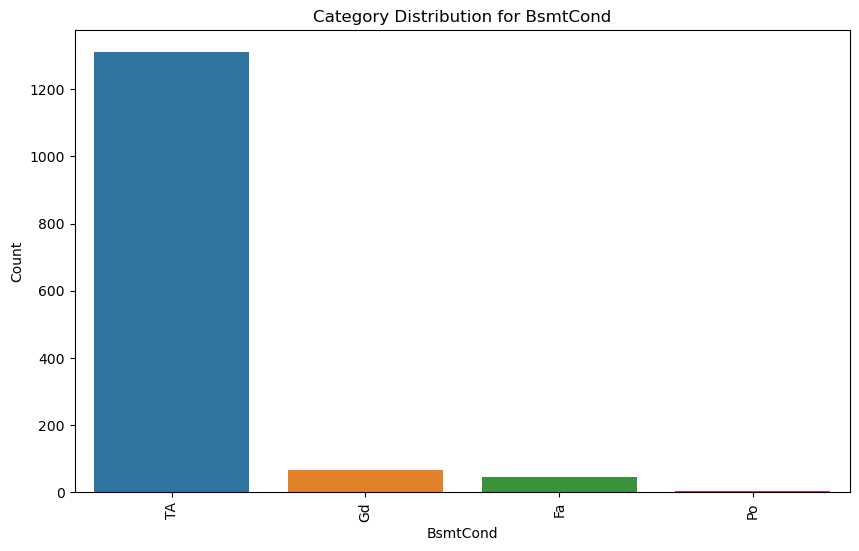

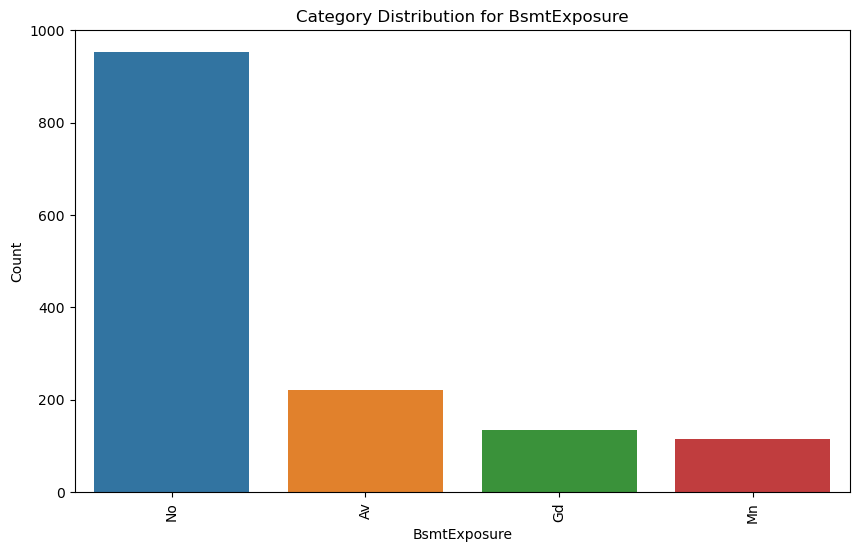

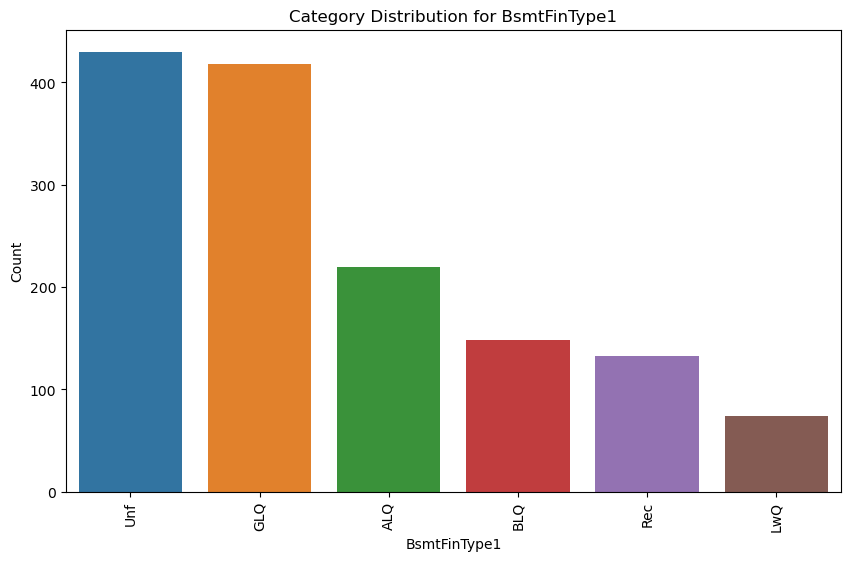

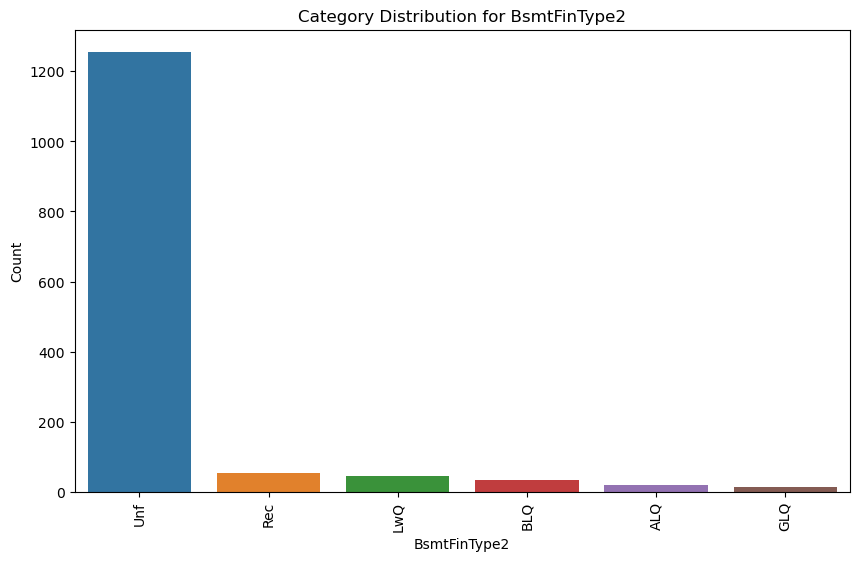

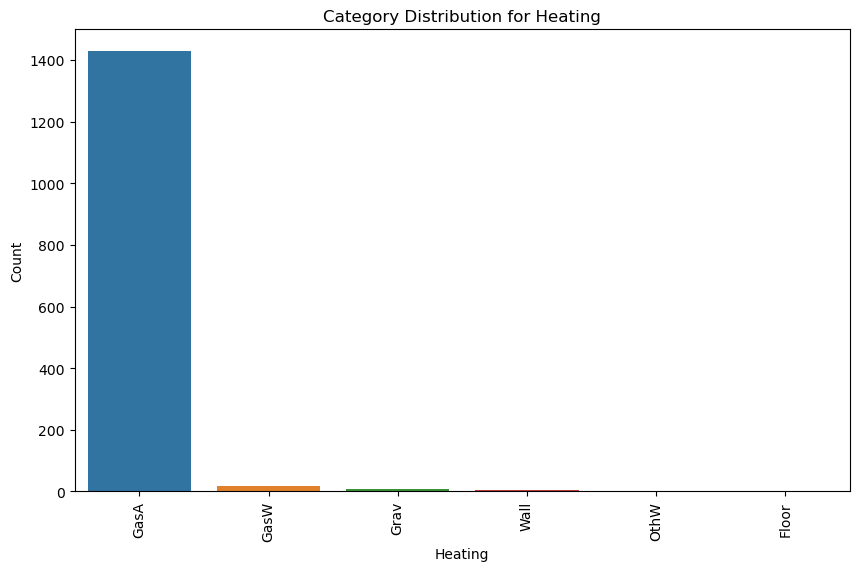

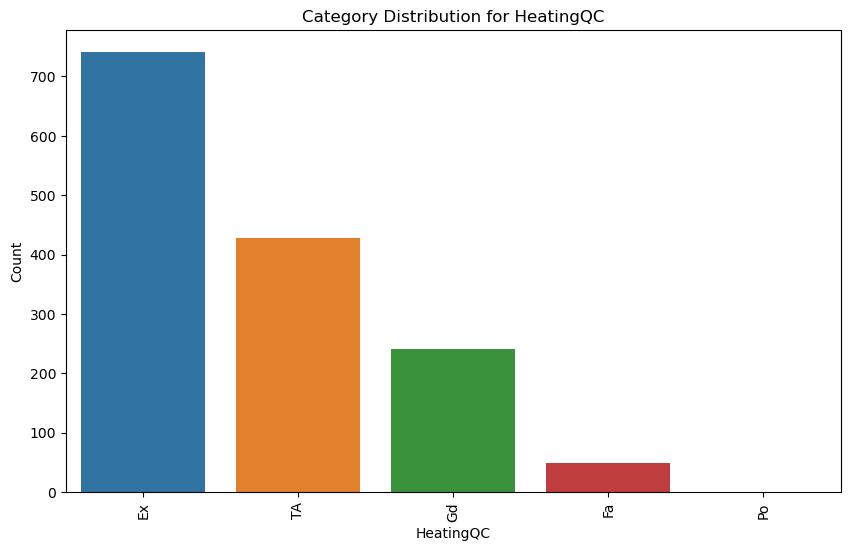

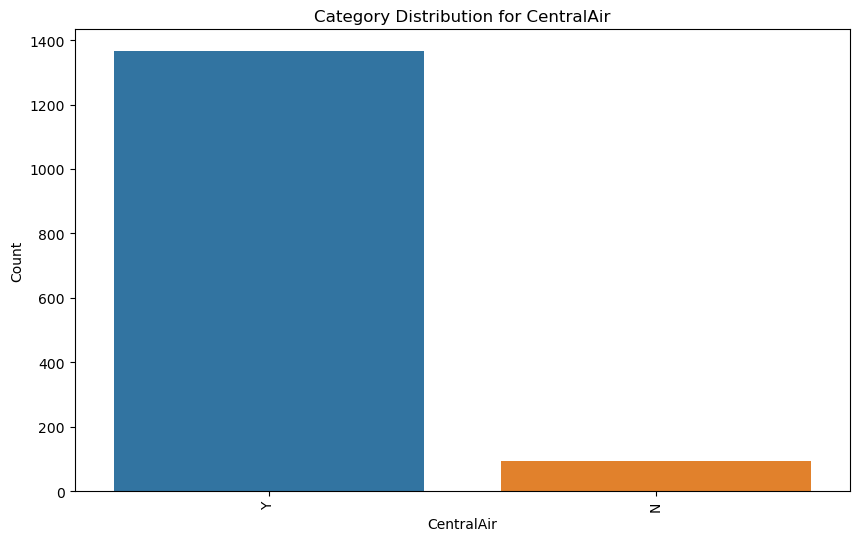

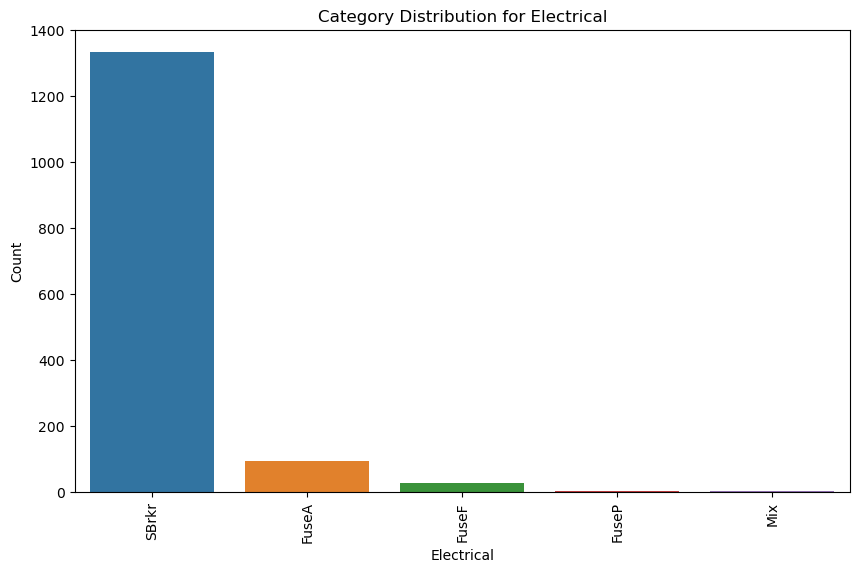

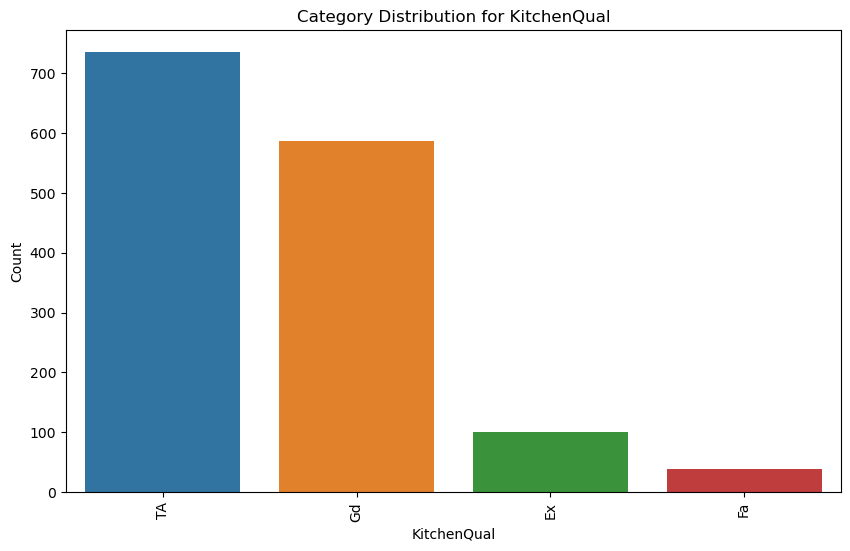

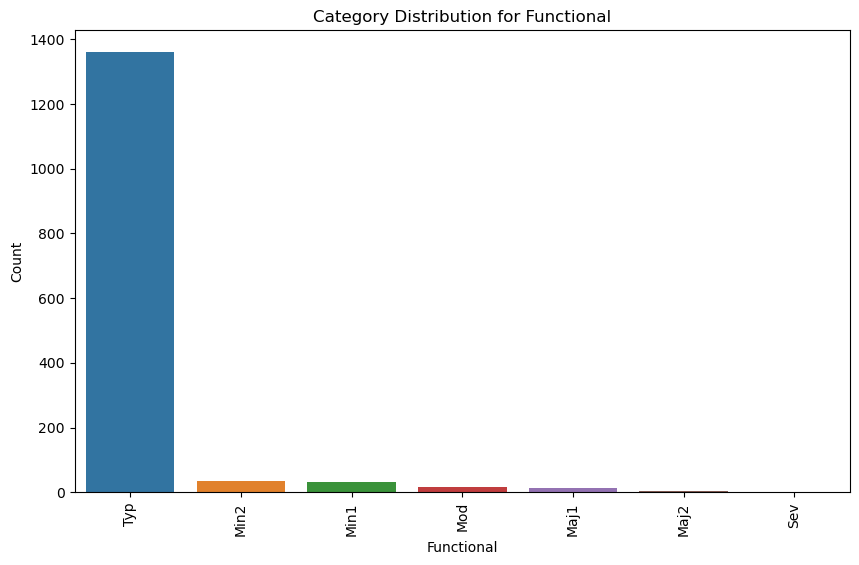

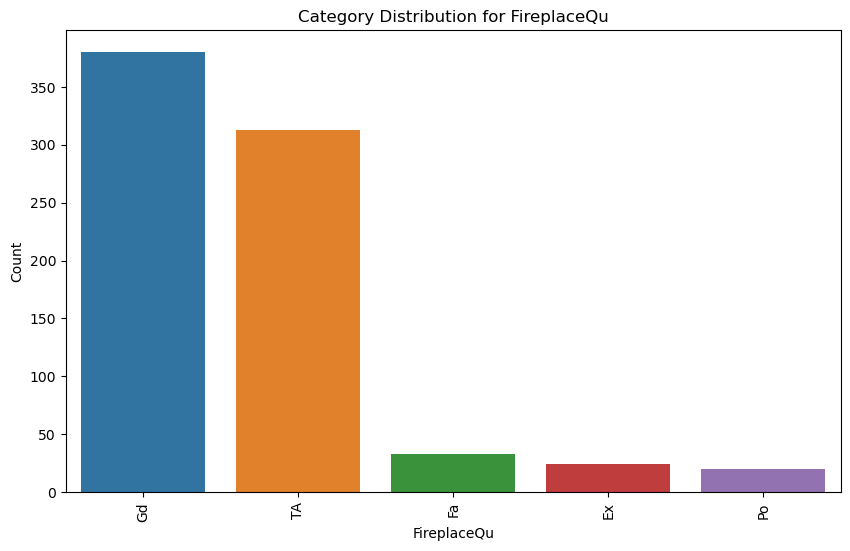

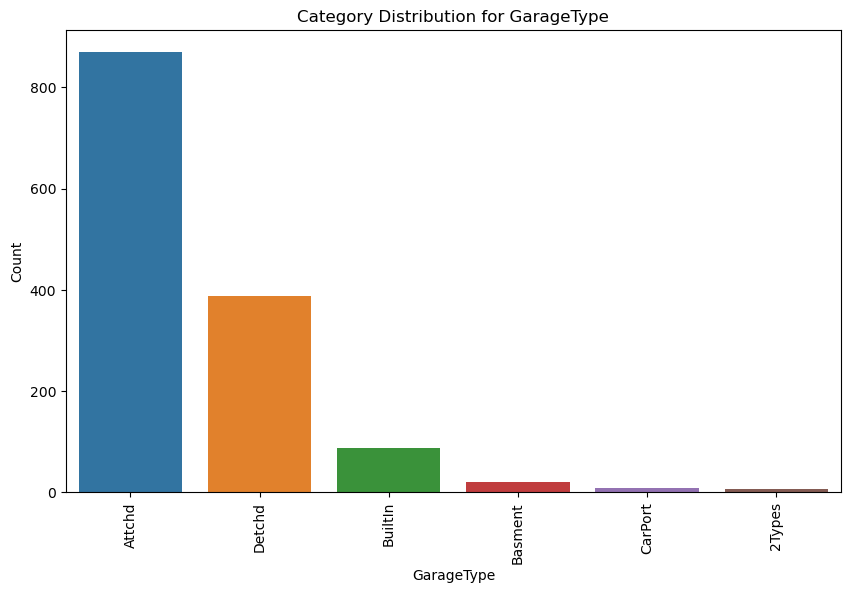

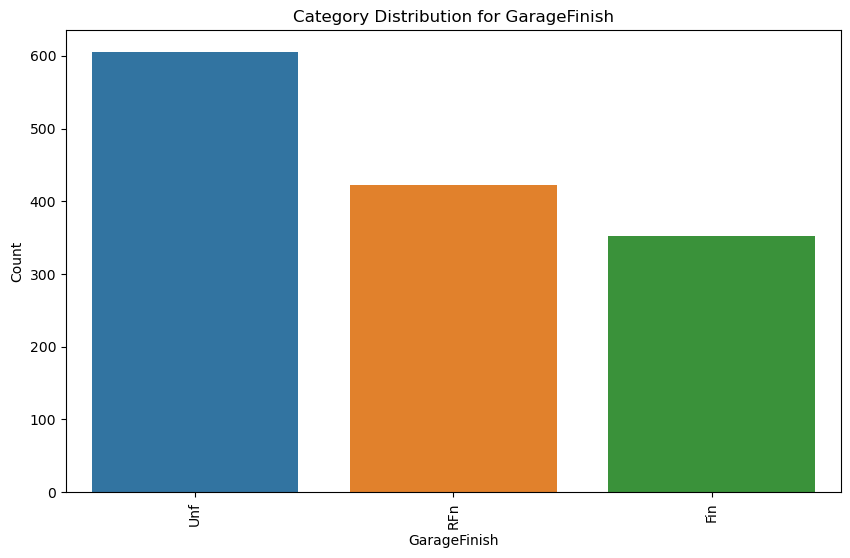

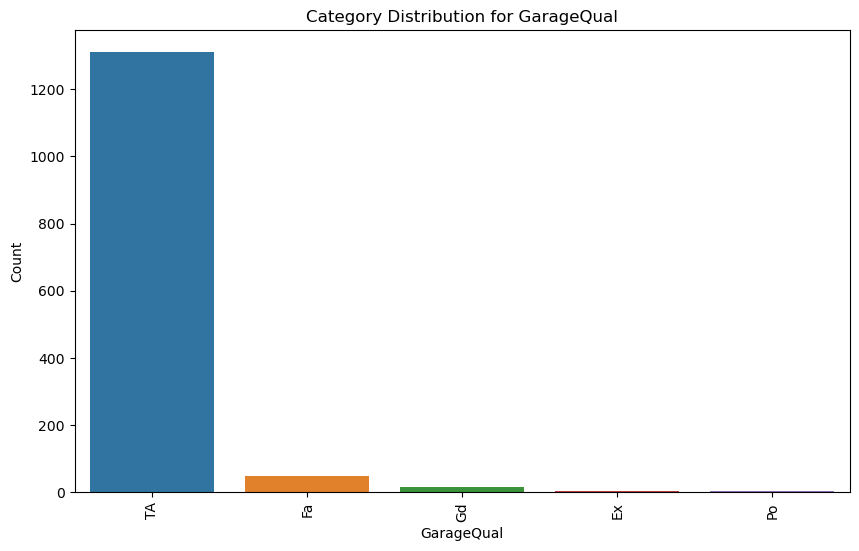

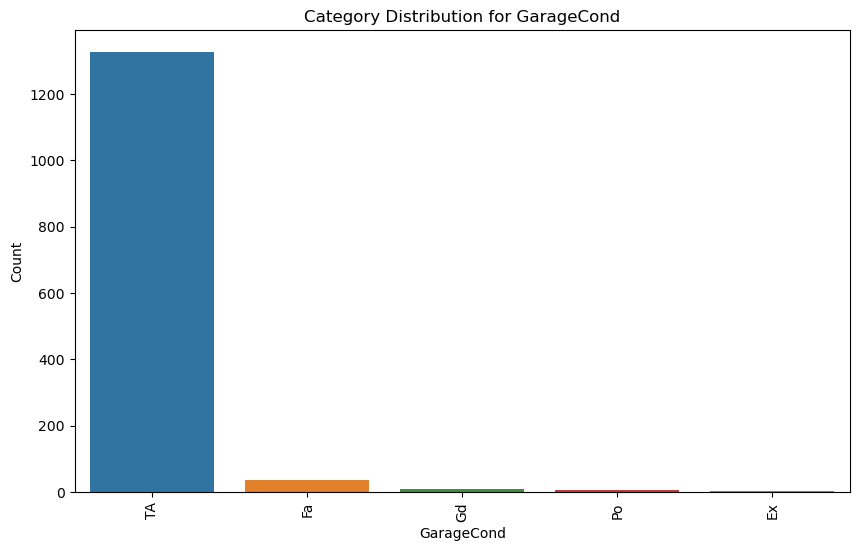

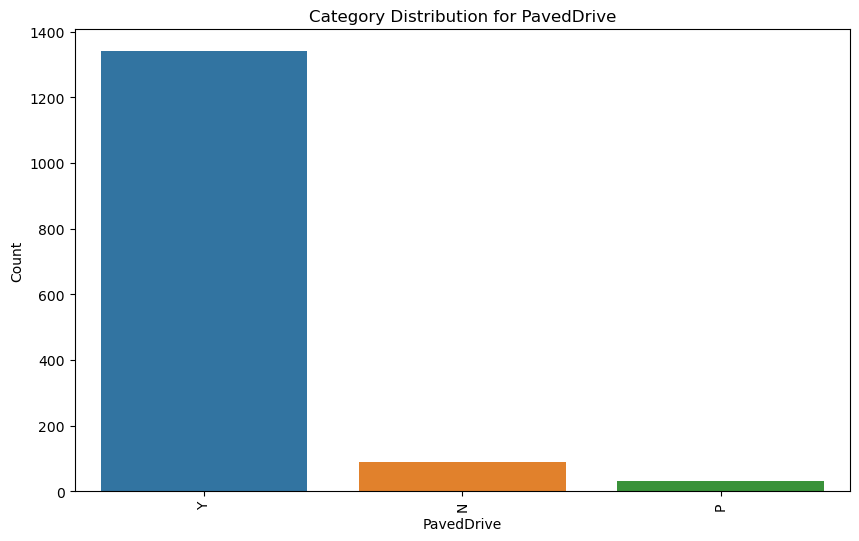

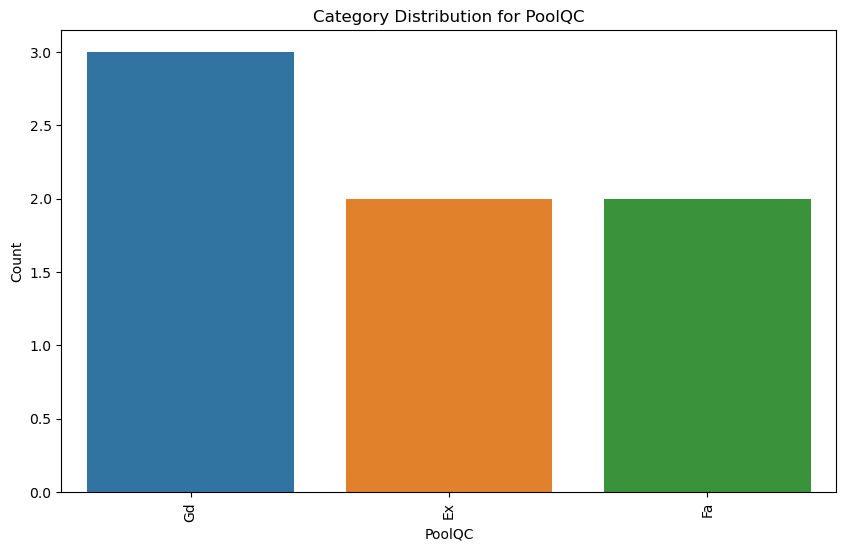

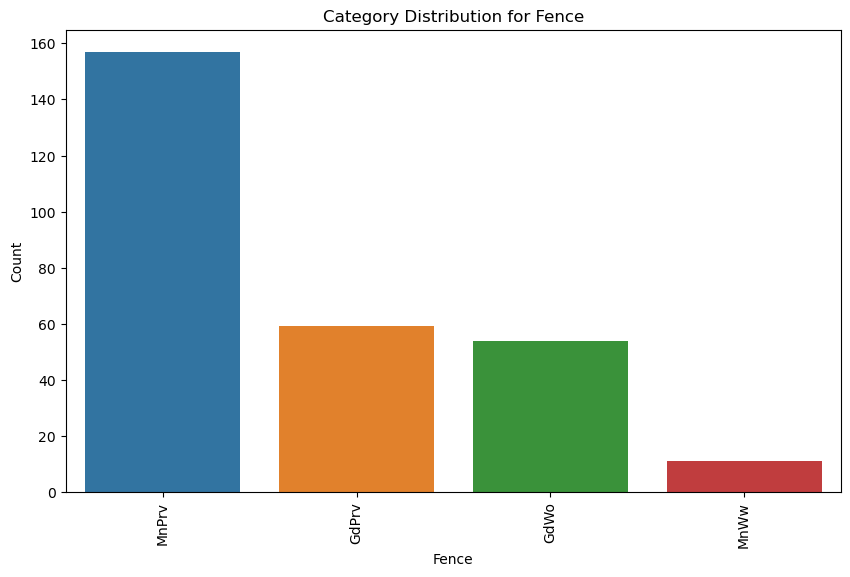

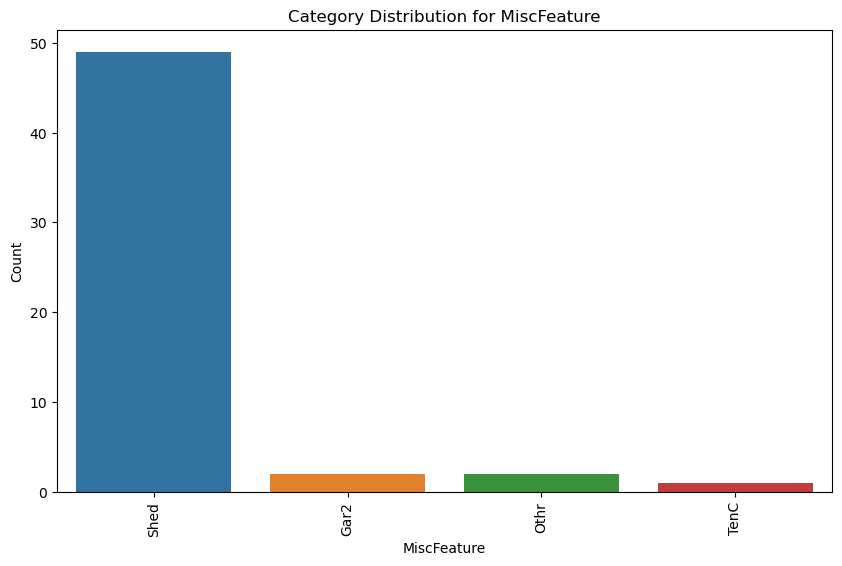

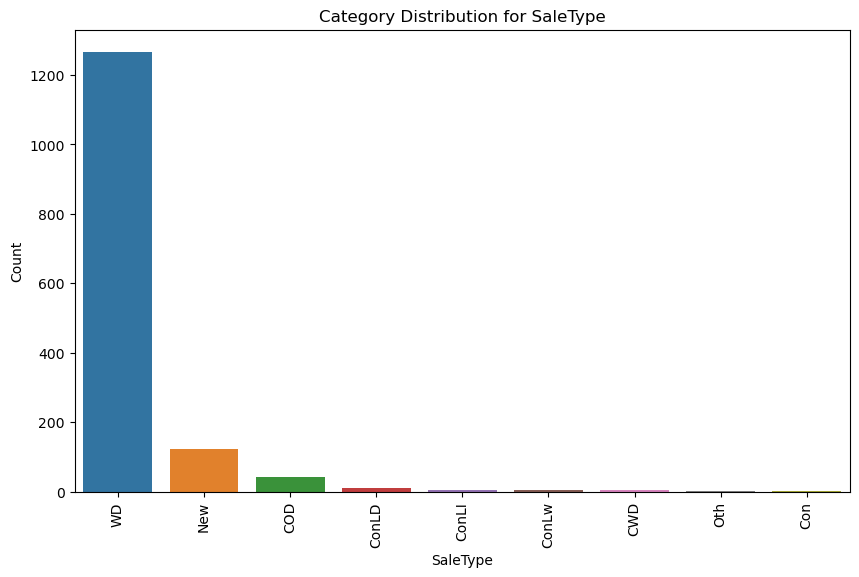

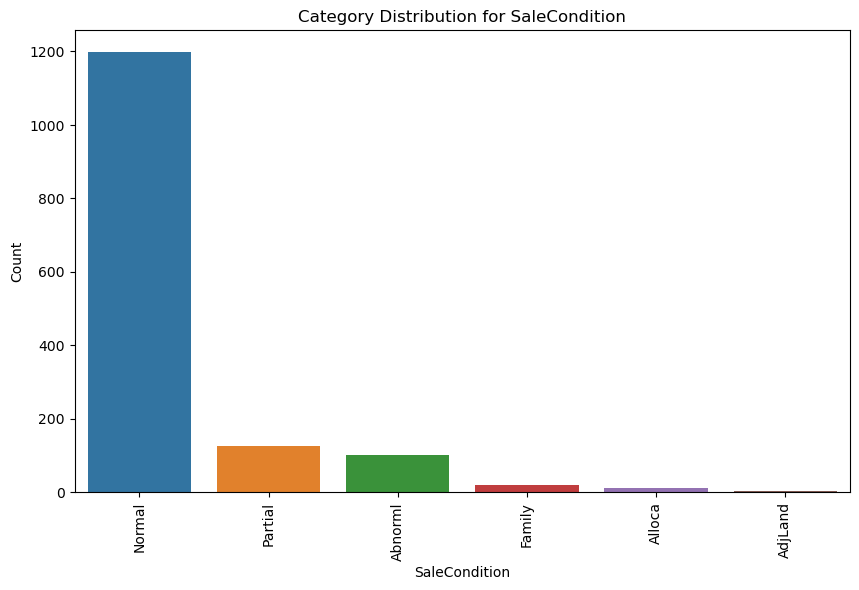

In [10]:
for feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data_train, x=feature, order=data_train[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Category Distribution for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

Interpretation of Feature Neighborhood

The plot for Neighborhood shows that there are significant differences in the number of houses across various neighborhoods. This indicates an imbalance in the distribution of neighborhoods. You may need to consider specific encoding techniques or preprocessing methods for this feature to address the imbalance and ensure that the model accurately captures the neighborhood effects.

Interpretation of Feature ExterQual

The plot for ExterQual reveals that the majority of houses have an exterior quality rating of "Good," with only a few having ratings of "Excellent" or "Fair." This suggests that the model should account for the influence of the more common exterior quality ratings and might need to assign more weight to the more frequently occurring categories to improve its predictive accuracy.

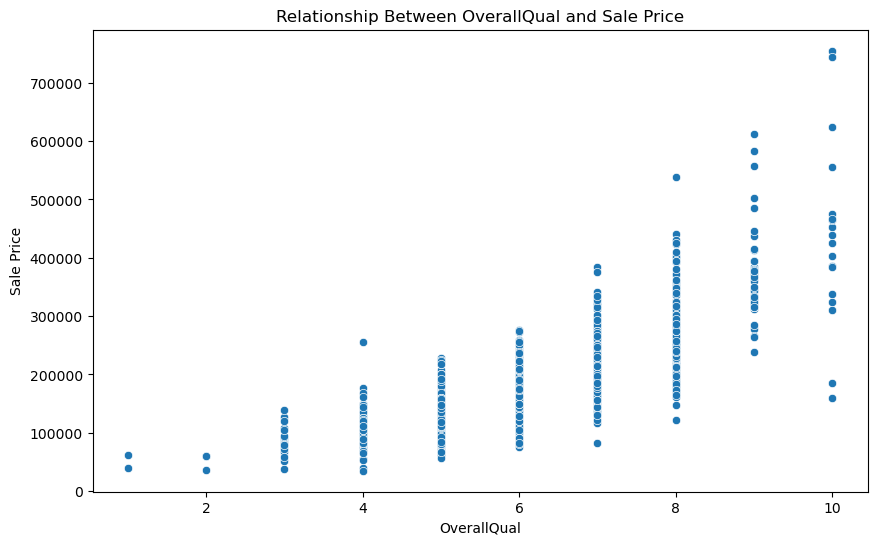

In [11]:
feature = 'OverallQual'

plt.figure(figsize=(10, 6))
sns.scatterplot(data_train, x=feature, y='SalePrice')
plt.title(f'Relationship Between {feature} and Sale Price')
plt.xlabel(feature)
plt.ylabel('Sale Price')
plt.show()

The scatter plot confirms that there is a strong positive relationship between OverallQual and SalePrice, supporting the notion that houses with better overall quality tend to command higher prices. This relationship should be considered in any predictive modeling of house prices, emphasizing the importance of overall quality in determining property values.

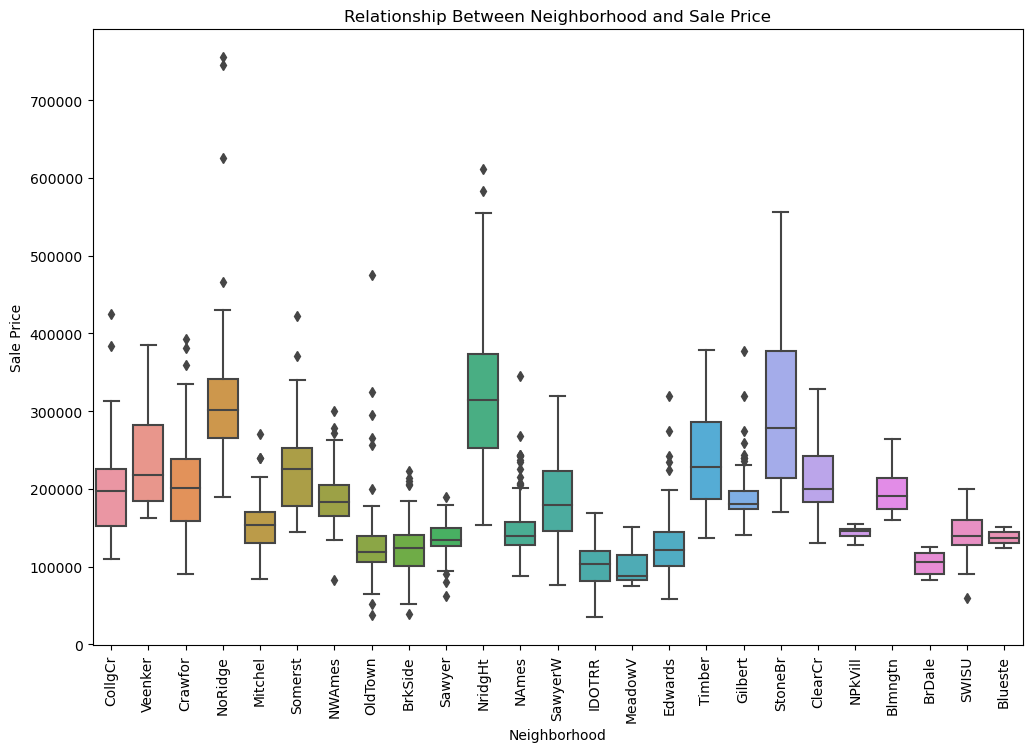

In [12]:
feature = 'Neighborhood'

plt.figure(figsize=(12, 8))
sns.boxplot(data_train, x=feature, y='SalePrice')
plt.xticks(rotation=90)
plt.title(f'Relationship Between {feature} and Sale Price')
plt.xlabel(feature)
plt.ylabel('Sale Price')
plt.show()

The boxplot highlights the significant variability in house prices across different neighborhoods. It indicates that Neighborhood has a considerable impact on SalePrice, with some neighborhoods consistently having higher or lower prices. This underscores the need to consider neighborhood-specific factors when analyzing or predicting house prices.

# HANDLING MISSING VALUES

In [13]:
missing_counts = data_train.isnull().sum()
missing_percentage = (missing_counts / len(data_train)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage': missing_percentage
})

print(missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False))

              Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtFinType2              38    2.602740
BsmtExposure              38    2.602740
BsmtFinType1              37    2.534247
BsmtCond                  37    2.534247
BsmtQual                  37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493


In [14]:
data = data_train.copy()

num_features_missing = ['LotFrontage', 'MasVnrArea']

# Impute with Median
print("\nImputing numeric missing values with median:")
for feature in num_features_missing:
    if missing_counts[feature] > 0:
        median_value = data[feature].median()
        data[feature].fillna(median_value, inplace=True)
        print(f'{feature}: Imputed with median value {median_value}')

cat_features_missing = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'Electrical']

# Impute with Mode
print("\nImputing categorical missing values with mode:")
for feature in cat_features_missing:
    if missing_counts[feature] > 0:
        mode_value = data[feature].mode()[0]
        data[feature].fillna(mode_value, inplace=True)
        print(f'{feature}: Imputed with mode value {mode_value}')

# Drop Features with High Missing Values
print("\nDropping features with high missing values:")
features_to_drop = missing_data[missing_data['Percentage'] > 50].index  # Drop features with more than 50% missing values
data.drop(columns=features_to_drop, inplace=True)
print(f'Dropped features: {features_to_drop.tolist()}')

# Drop Rows with Missing Values
data.dropna(inplace=True)
print("Dropped rows with missing values.")

print("\nData after handling missing values:")
print(data.info())


Imputing numeric missing values with median:
LotFrontage: Imputed with median value 69.0
MasVnrArea: Imputed with median value 0.0

Imputing categorical missing values with mode:
PoolQC: Imputed with mode value Gd
MiscFeature: Imputed with mode value Shed
Alley: Imputed with mode value Grvl
Fence: Imputed with mode value MnPrv
MasVnrType: Imputed with mode value BrkFace
FireplaceQu: Imputed with mode value Gd
GarageType: Imputed with mode value Attchd
GarageYrBlt: Imputed with mode value 2005.0
GarageFinish: Imputed with mode value Unf
GarageQual: Imputed with mode value TA
GarageCond: Imputed with mode value TA
BsmtFinType2: Imputed with mode value Unf
BsmtExposure: Imputed with mode value No
BsmtFinType1: Imputed with mode value Unf
BsmtCond: Imputed with mode value TA
BsmtQual: Imputed with mode value TA
Electrical: Imputed with mode value SBrkr

Dropping features with high missing values:
Dropped features: ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
Dropped rows with

# HANDLING 0 VALUES

In [15]:
zero_counts = (data == 0).sum()
zero_percentage = (zero_counts / len(data)) * 100

zero_data = pd.DataFrame({
    'Zero Values': zero_counts,
    'Percentage': zero_percentage
})

print(zero_data[zero_data['Zero Values'] > 0].sort_values(by='Percentage', ascending=False))

               Zero Values  Percentage
PoolArea              1453   99.520548
3SsnPorch             1436   98.356164
LowQualFinSF          1434   98.219178
MiscVal               1408   96.438356
BsmtHalfBath          1378   94.383562
ScreenPorch           1344   92.054795
BsmtFinSF2            1293   88.561644
EnclosedPorch         1252   85.753425
HalfBath               913   62.534247
MasVnrArea             869   59.520548
BsmtFullBath           856   58.630137
2ndFlrSF               829   56.780822
WoodDeckSF             761   52.123288
Fireplaces             690   47.260274
OpenPorchSF            656   44.931507
BsmtFinSF1             467   31.986301
BsmtUnfSF              118    8.082192
GarageCars              81    5.547945
GarageArea              81    5.547945
TotalBsmtSF             37    2.534247
FullBath                 9    0.616438
BedroomAbvGr             6    0.410959
KitchenAbvGr             1    0.068493


In [16]:
# feature with 0 values (-100%)
features_to_drop = ['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch']

# Drop feature
data.drop(columns=features_to_drop, inplace=True)
print(f'Dropped features with almost 100% zero values: {features_to_drop}')

Dropped features with almost 100% zero values: ['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch']


In [17]:
# features with almost 50% zero values
numeric_features_significant_zero = ['MasVnrArea', 'HalfBath', 'BsmtFullBath', '2ndFlrSF', 'WoodDeckSF', 'Fireplaces', 'OpenPorchSF', 'BsmtFinSF1']

#change 0 with NaN
for feature in numeric_features_significant_zero:
    data[feature].replace(0, np.nan, inplace=True)

# Imputation with median
for feature in numeric_features_significant_zero:
    if data[feature].isnull().sum() > 0:
        median_value = data[feature].median()
        data[feature].fillna(median_value, inplace=True)
        print(f'{feature}: Imputed with median value {median_value}')

MasVnrArea: Imputed with median value 203.0
HalfBath: Imputed with median value 1.0
BsmtFullBath: Imputed with median value 1.0
2ndFlrSF: Imputed with median value 776.0
WoodDeckSF: Imputed with median value 171.0
Fireplaces: Imputed with median value 1.0
OpenPorchSF: Imputed with median value 63.0
BsmtFinSF1: Imputed with median value 604.0


In [18]:
# features below 10% zero values

numeric_features_low_zero = ['GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr','BsmtUnfSF']

for feature in numeric_features_low_zero:
    data[feature].replace(0, np.nan, inplace=True)

for feature in numeric_features_low_zero:
    if data[feature].isnull().sum() > 0:
        median_value = data[feature].median()
        data[feature].fillna(median_value, inplace=True)
        print(f'{feature}: Imputed with median value {median_value}')

GarageCars: Imputed with median value 2.0
GarageArea: Imputed with median value 484.0
TotalBsmtSF: Imputed with median value 1004.0
FullBath: Imputed with median value 2.0
BedroomAbvGr: Imputed with median value 3.0
KitchenAbvGr: Imputed with median value 1.0
BsmtUnfSF: Imputed with median value 536.0


In [19]:
remaining_zero_counts = (data == 0).sum()
print("Remaining zero values after handling:")
print(remaining_zero_counts[remaining_zero_counts > 0])

print("\nData after handling 0 values:")
print(data.info())

Remaining zero values after handling:
Series([], dtype: int64)

Data after handling 0 values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  Ov

# DISTRIBUTION AND OUTLIER

In [20]:
data2= data.copy()

In [21]:
numerical_features = data2.select_dtypes(include=[np.number]).columns.tolist()

outliers = {}

for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definisikan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Deteksi outliers
    outlier_count = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].shape[0]
    outliers[feature] = outlier_count
    print(f'{feature}: {outlier_count} outliers detected')

print("\nOutliers detected for each feature:")
print(outliers)

Id: 0 outliers detected
MSSubClass: 103 outliers detected
LotFrontage: 106 outliers detected
LotArea: 69 outliers detected
OverallQual: 2 outliers detected
OverallCond: 125 outliers detected
YearBuilt: 7 outliers detected
YearRemodAdd: 0 outliers detected
MasVnrArea: 589 outliers detected
BsmtFinSF1: 232 outliers detected
BsmtUnfSF: 54 outliers detected
TotalBsmtSF: 28 outliers detected
1stFlrSF: 20 outliers detected
2ndFlrSF: 630 outliers detected
GrLivArea: 31 outliers detected
BsmtFullBath: 16 outliers detected
FullBath: 0 outliers detected
HalfBath: 12 outliers detected
BedroomAbvGr: 29 outliers detected
KitchenAbvGr: 67 outliers detected
TotRmsAbvGrd: 30 outliers detected
Fireplaces: 120 outliers detected
GarageYrBlt: 1 outliers detected
GarageCars: 5 outliers detected
GarageArea: 71 outliers detected
WoodDeckSF: 694 outliers detected
OpenPorchSF: 496 outliers detected
MoSold: 0 outliers detected
YrSold: 0 outliers detected
SalePrice: 61 outliers detected

Outliers detected for ea

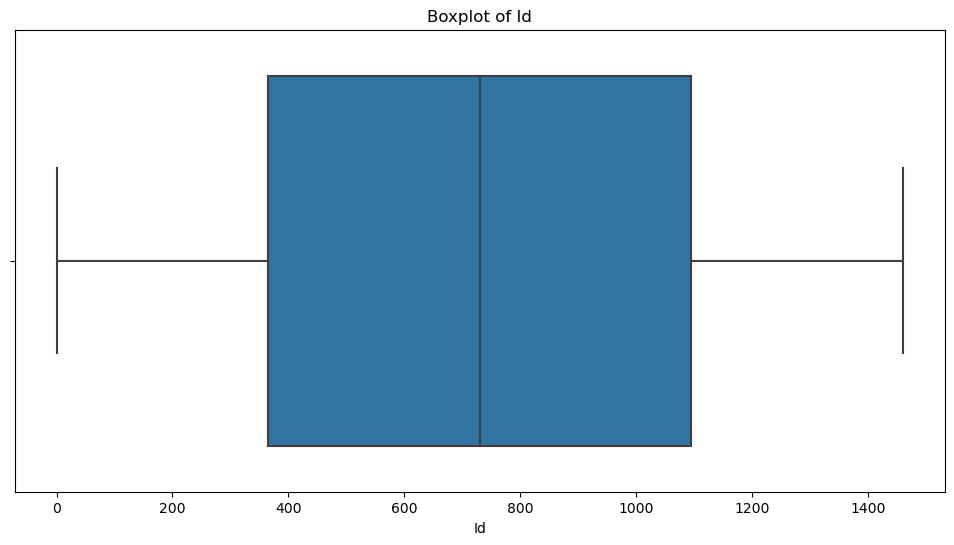

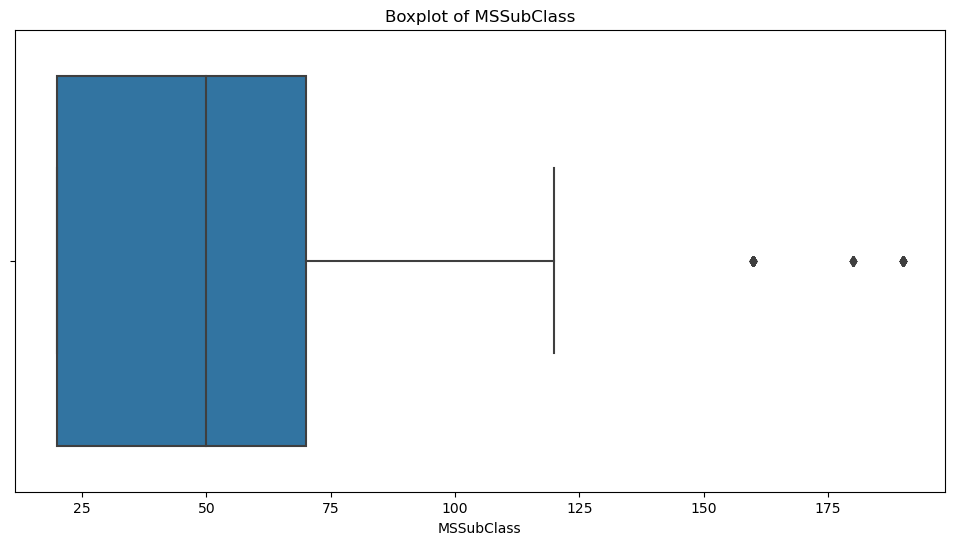

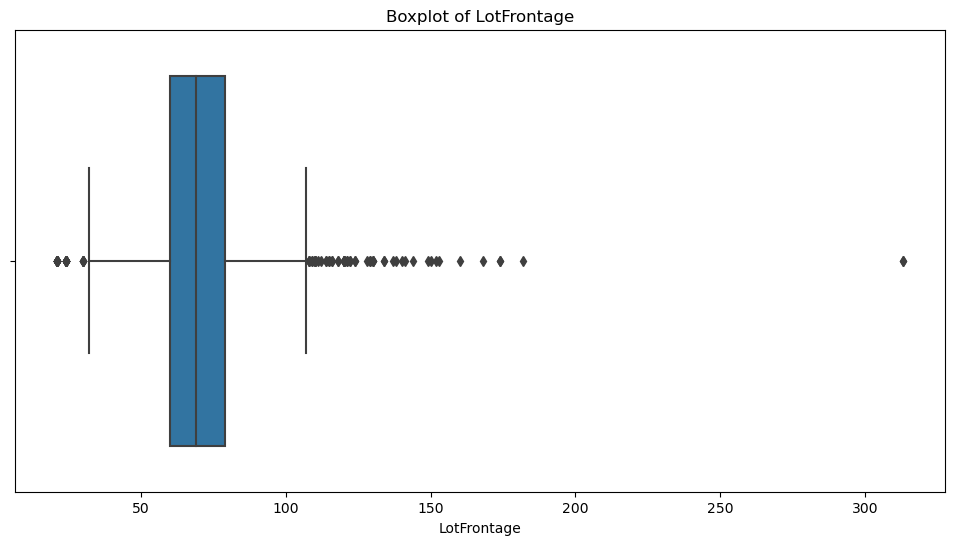

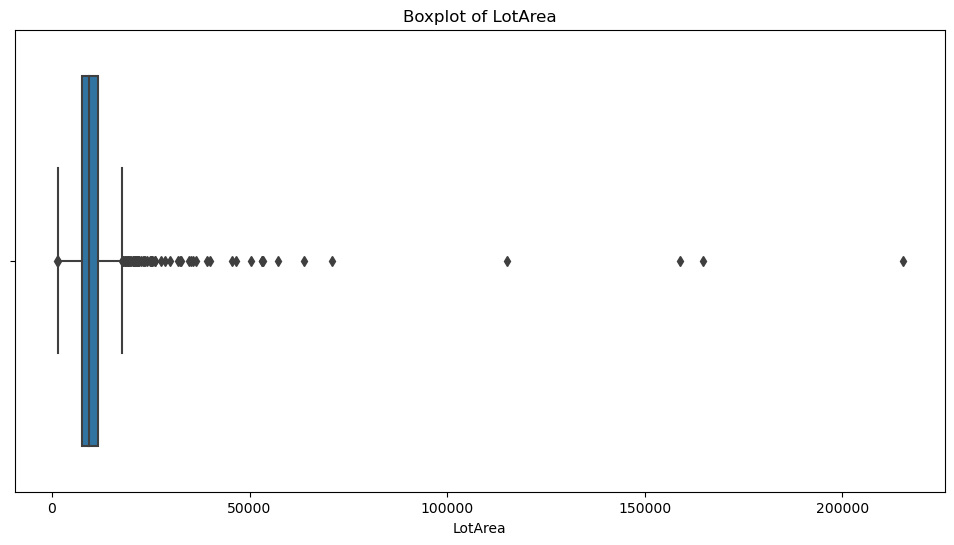

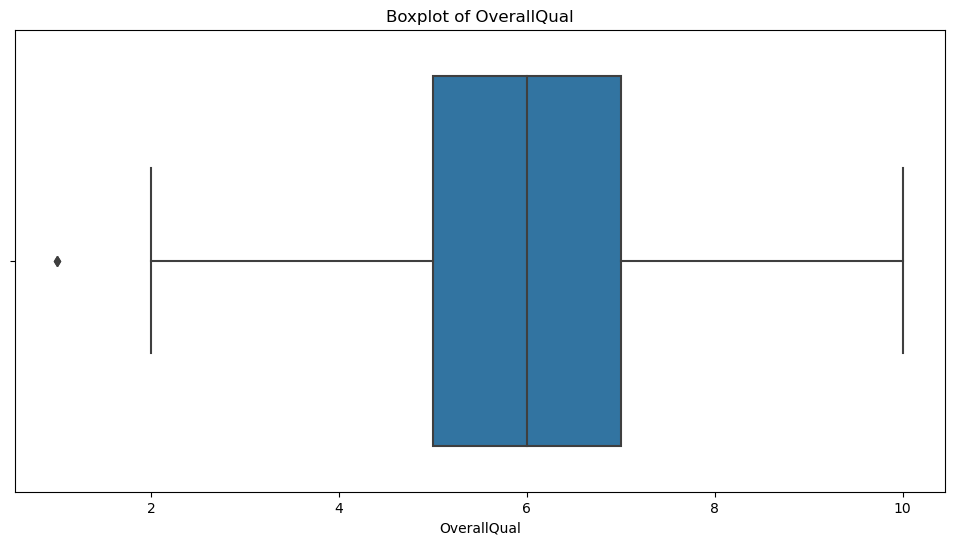

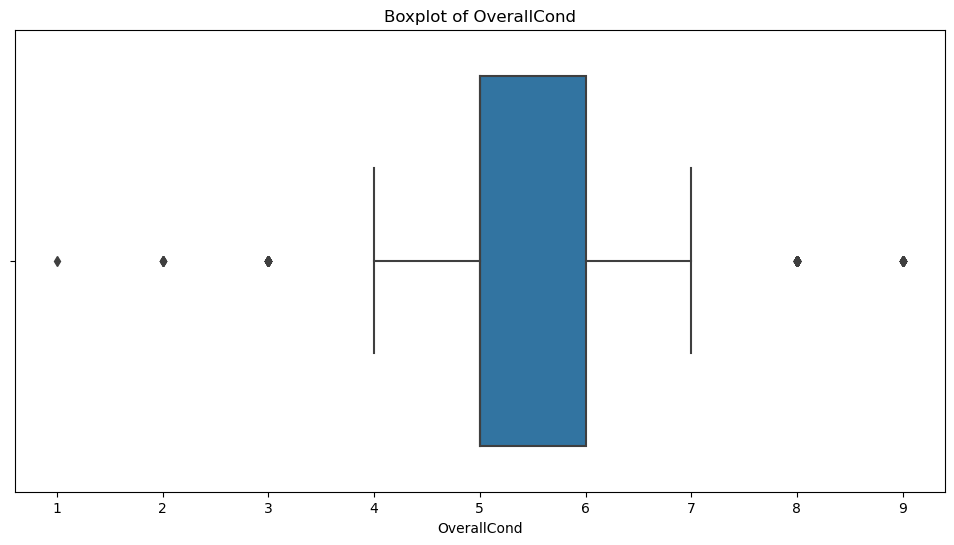

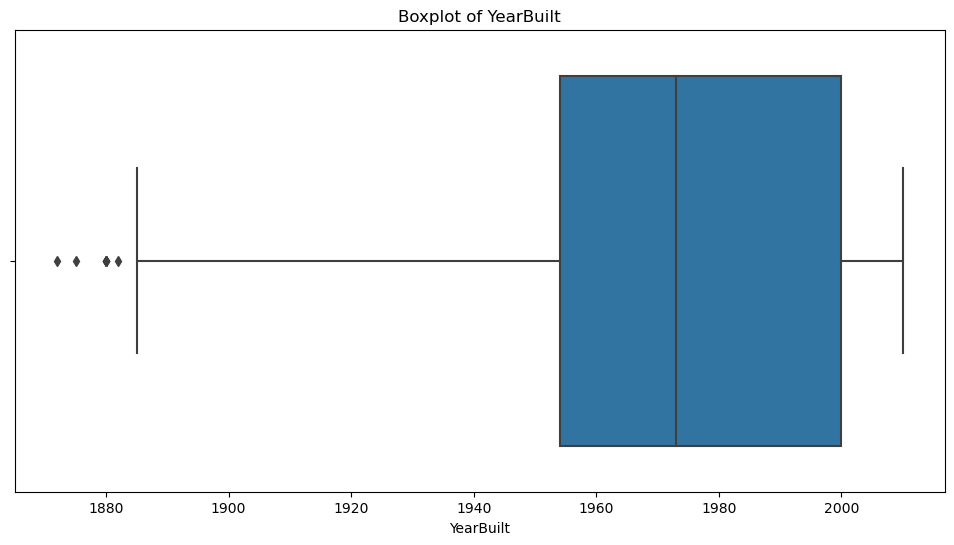

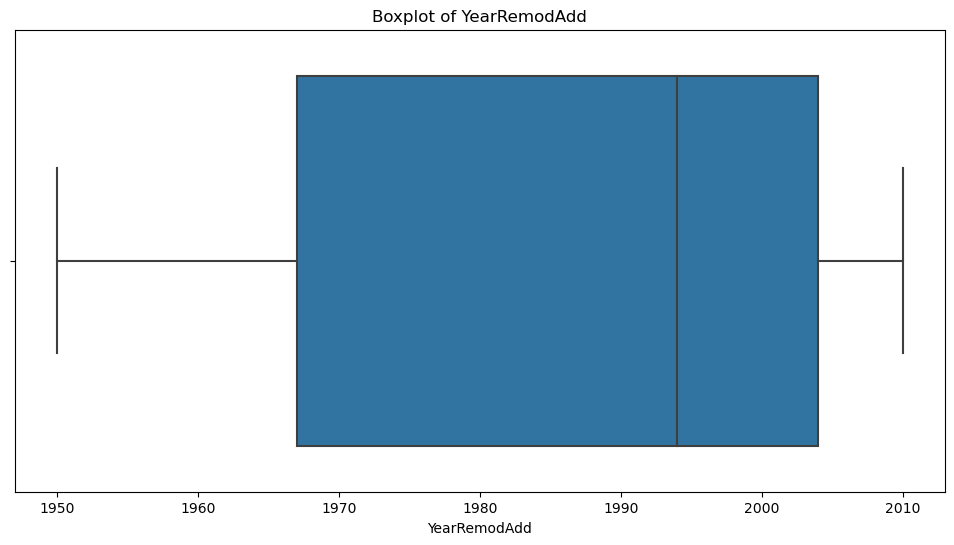

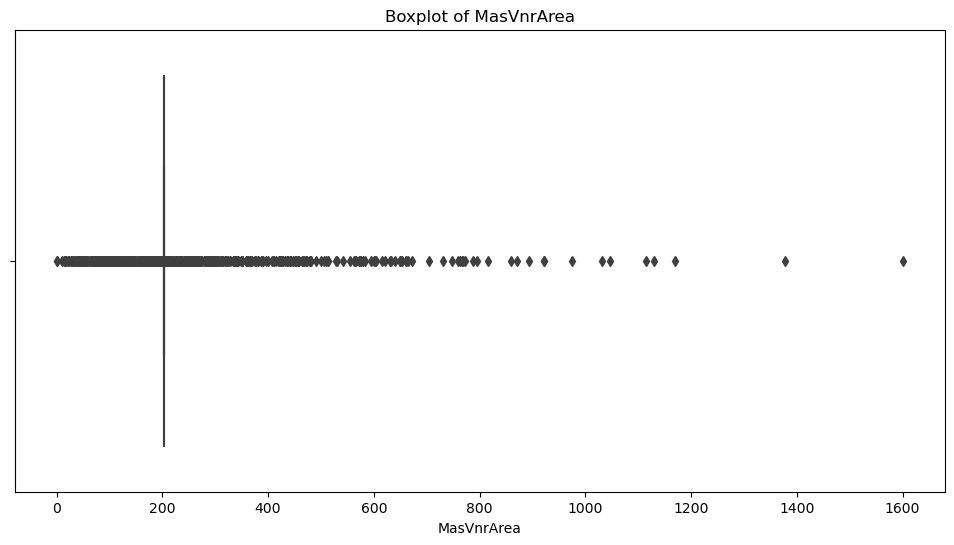

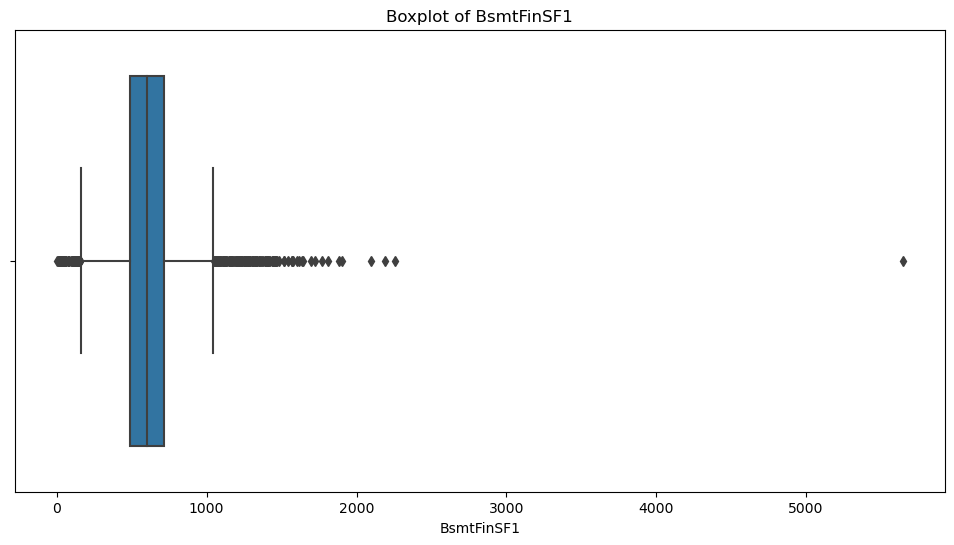

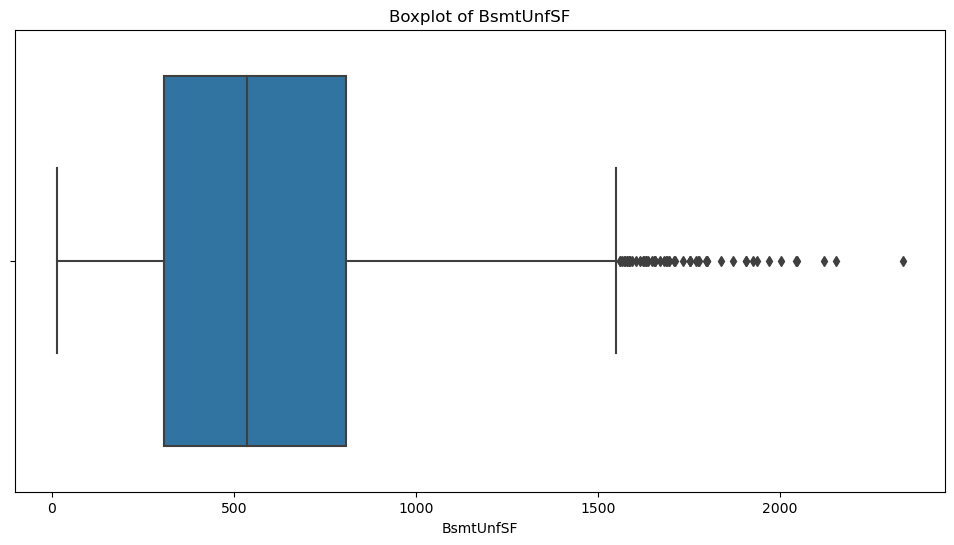

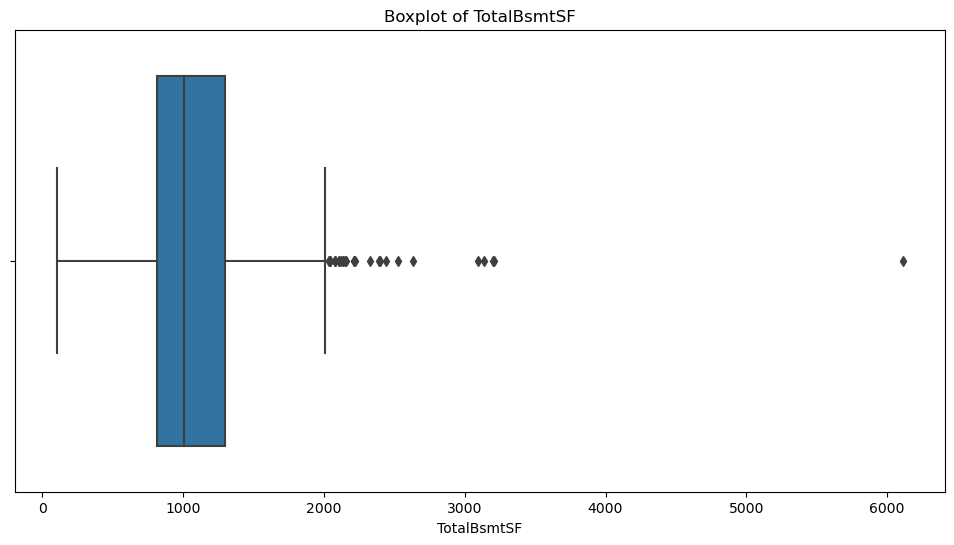

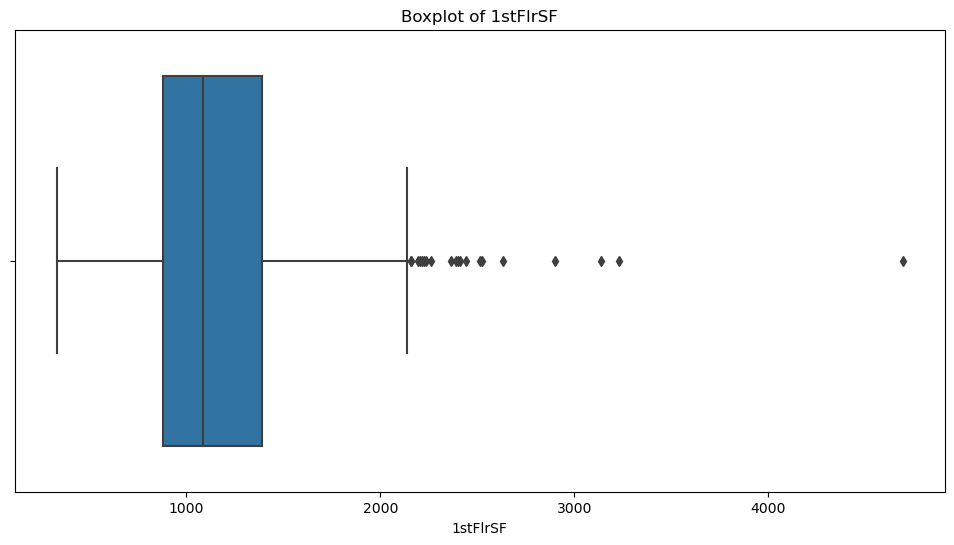

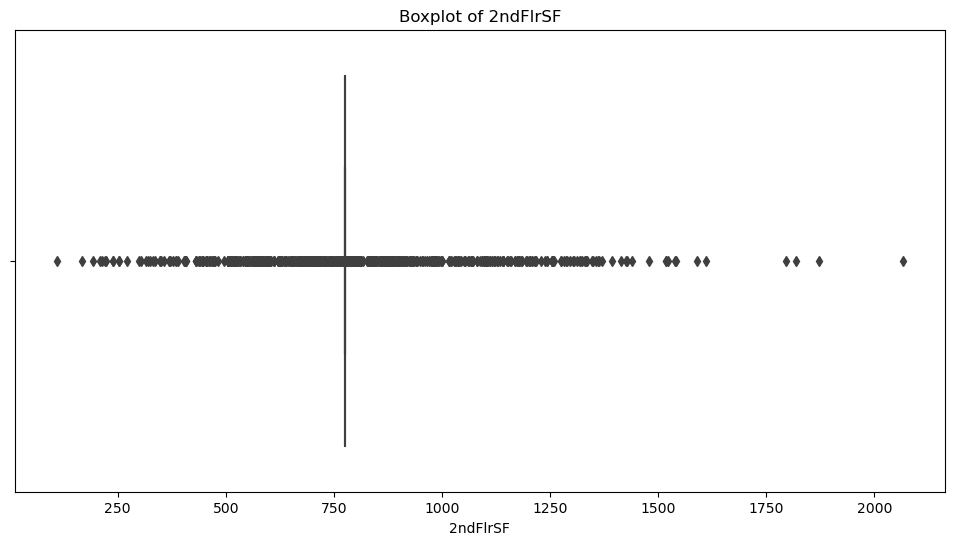

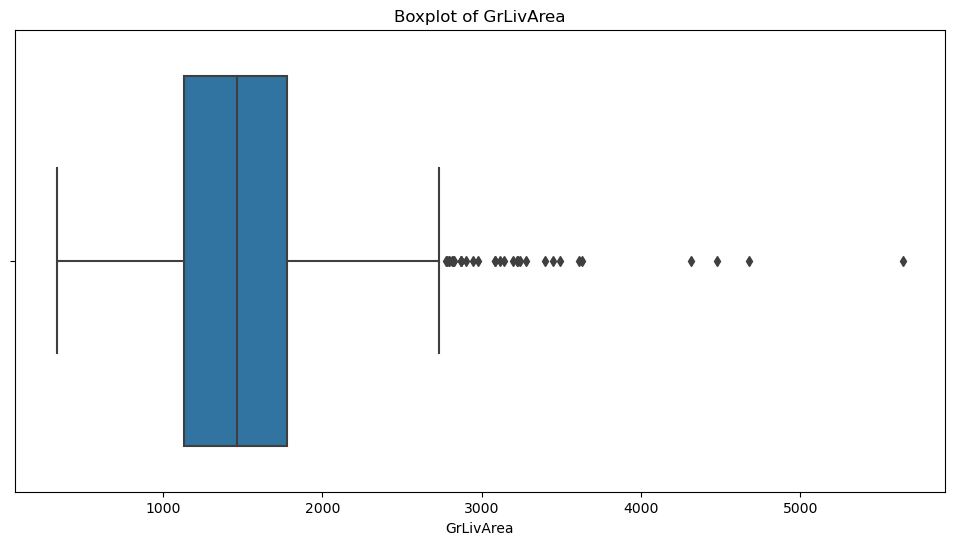

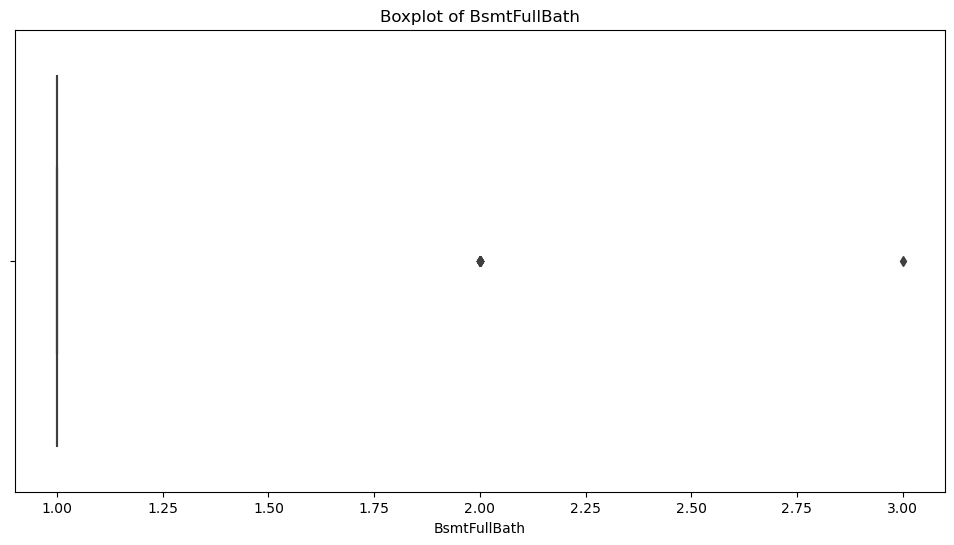

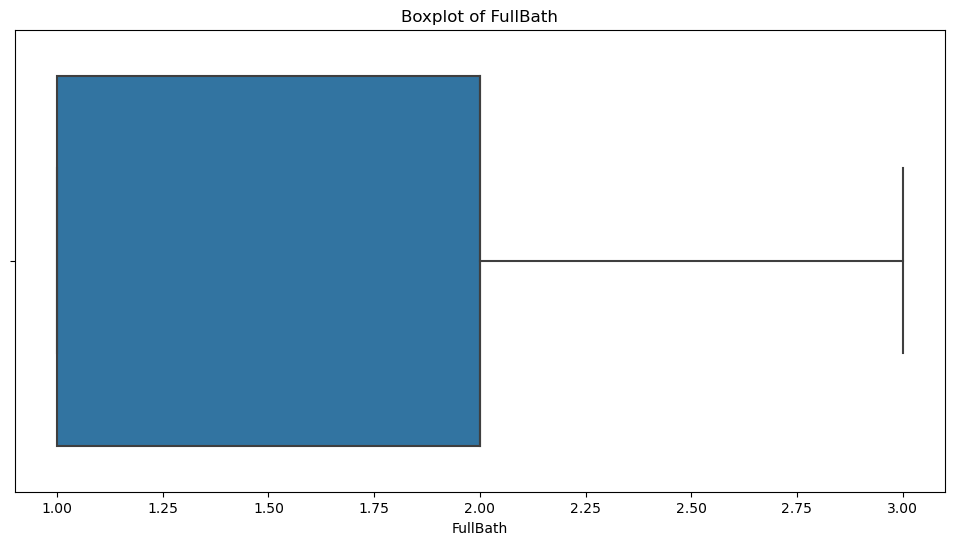

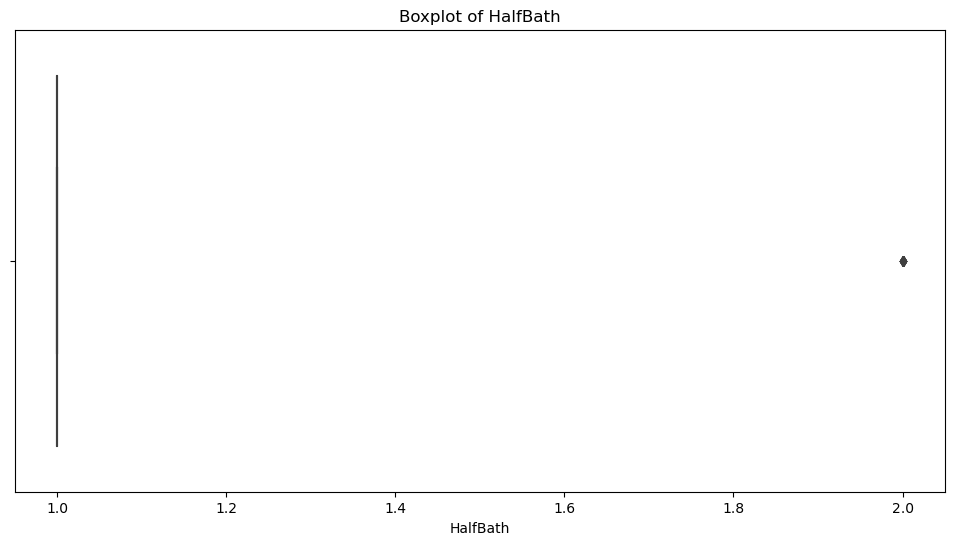

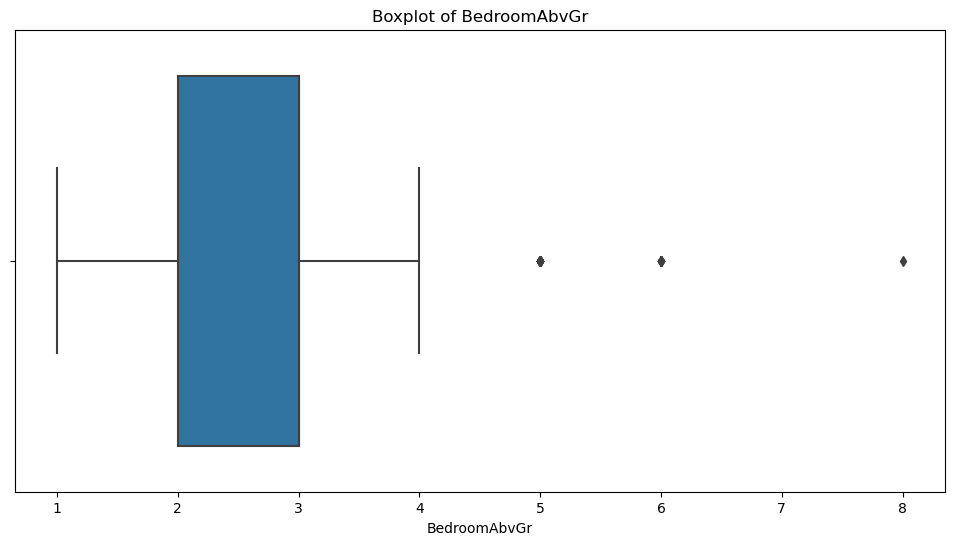

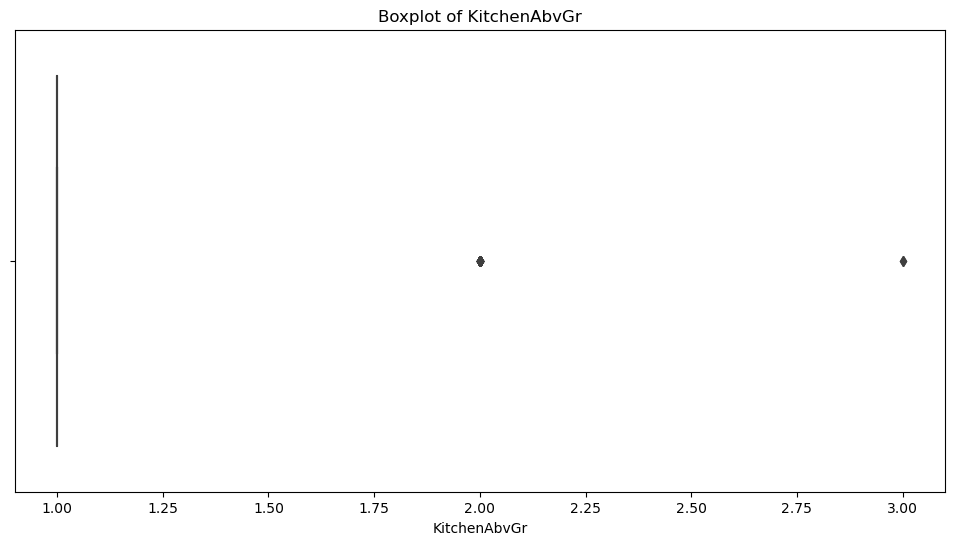

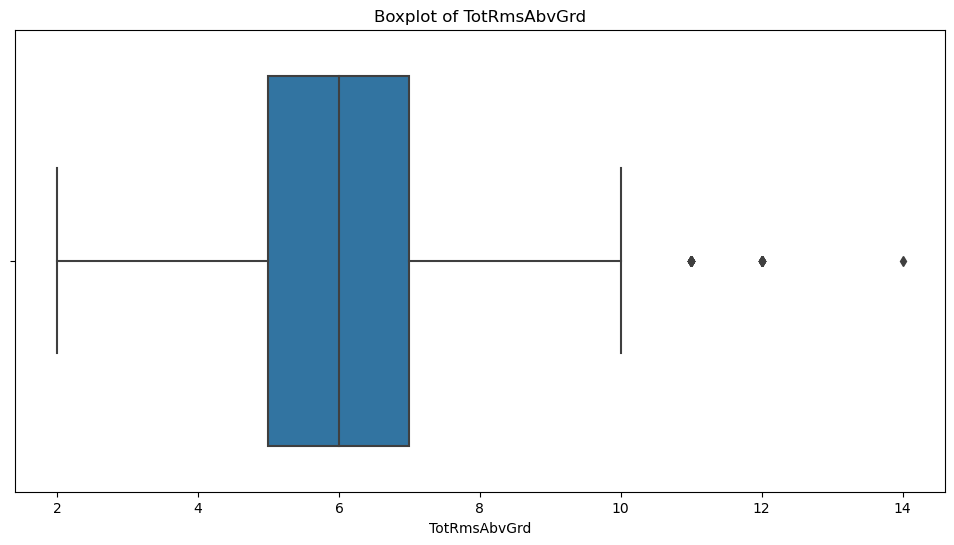

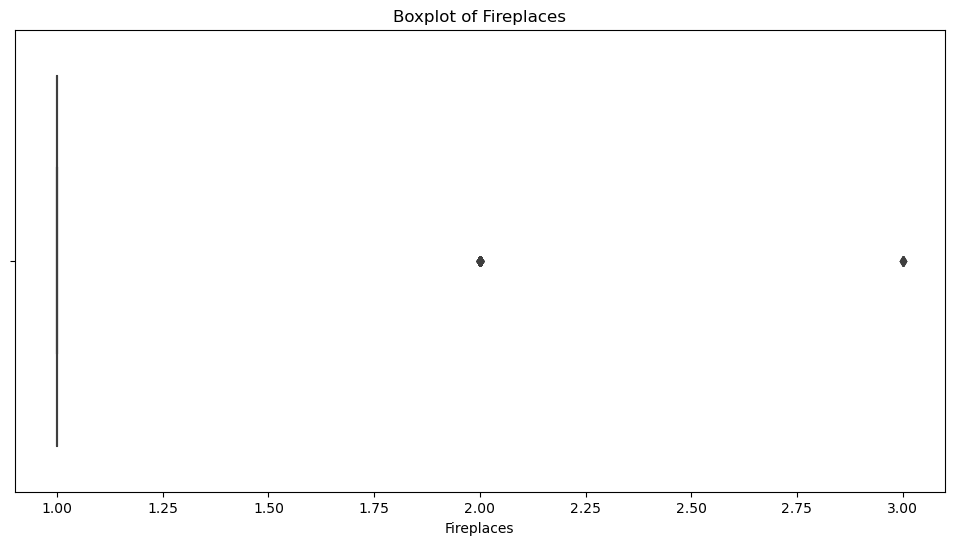

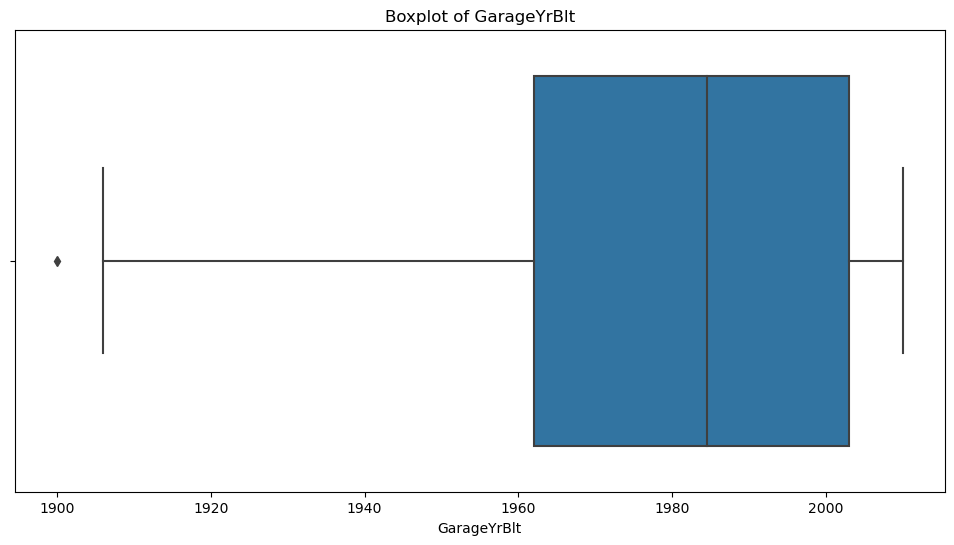

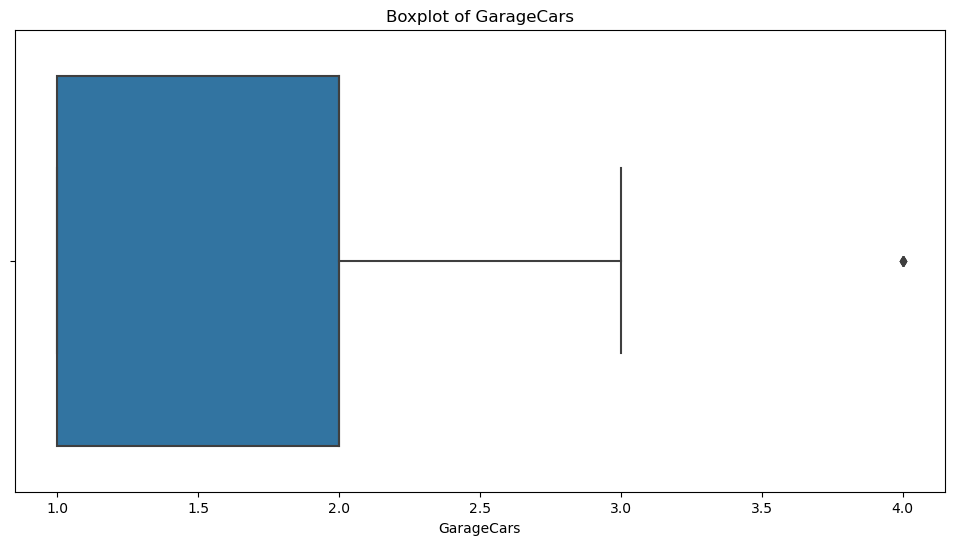

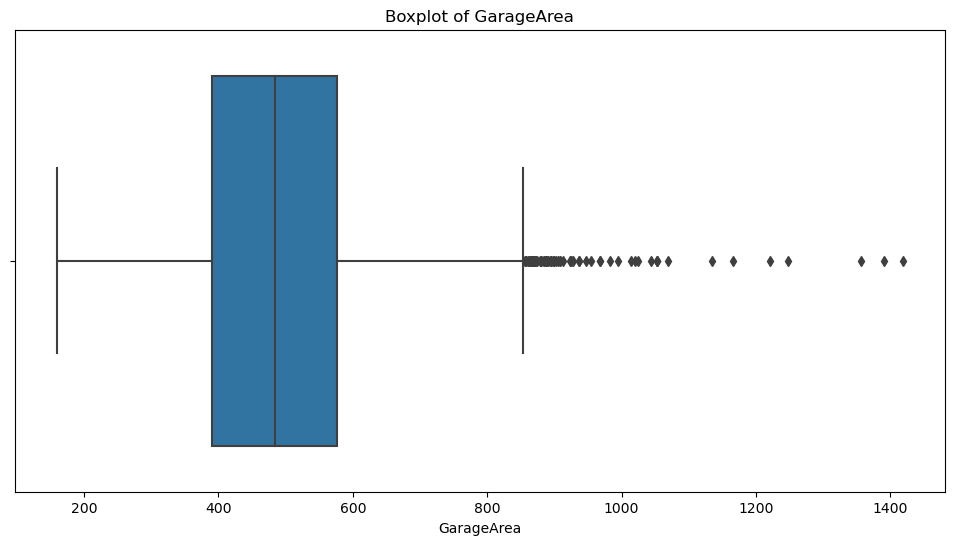

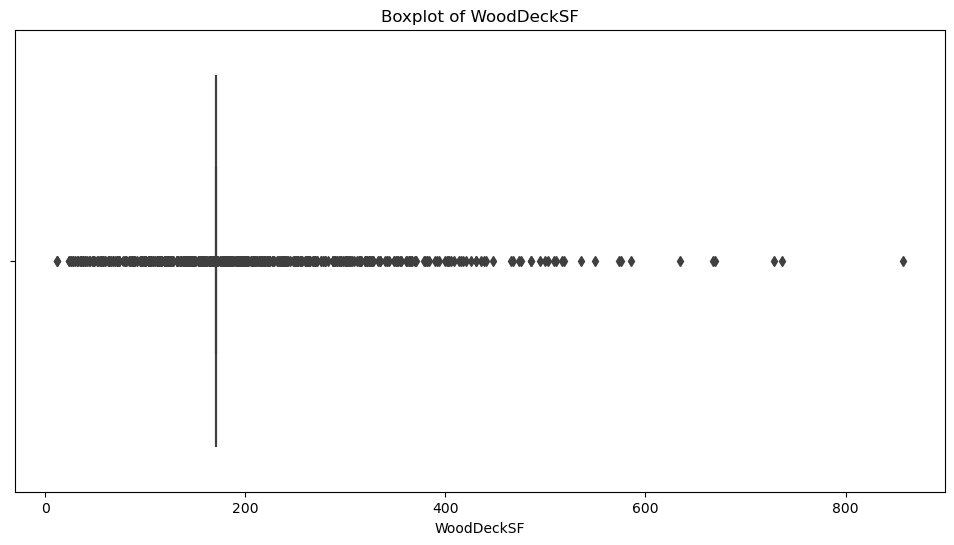

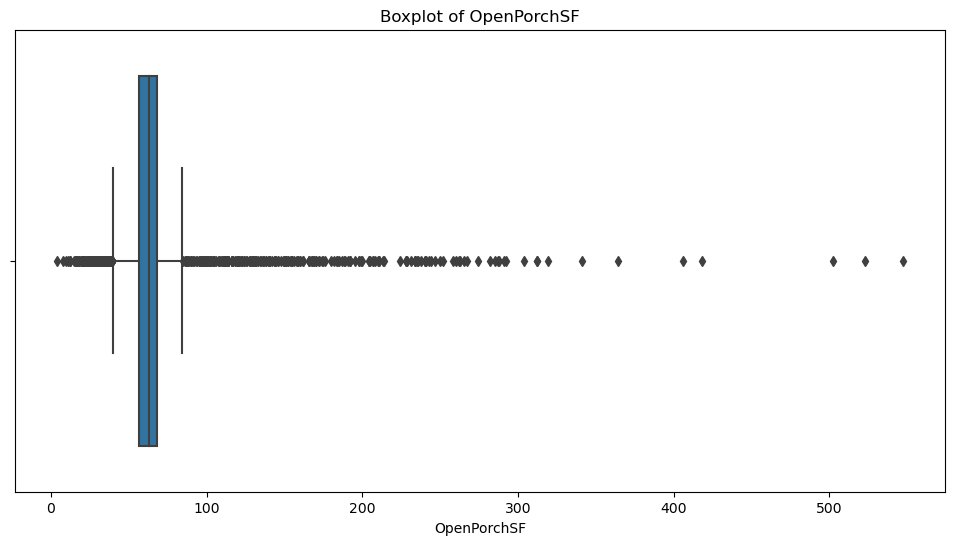

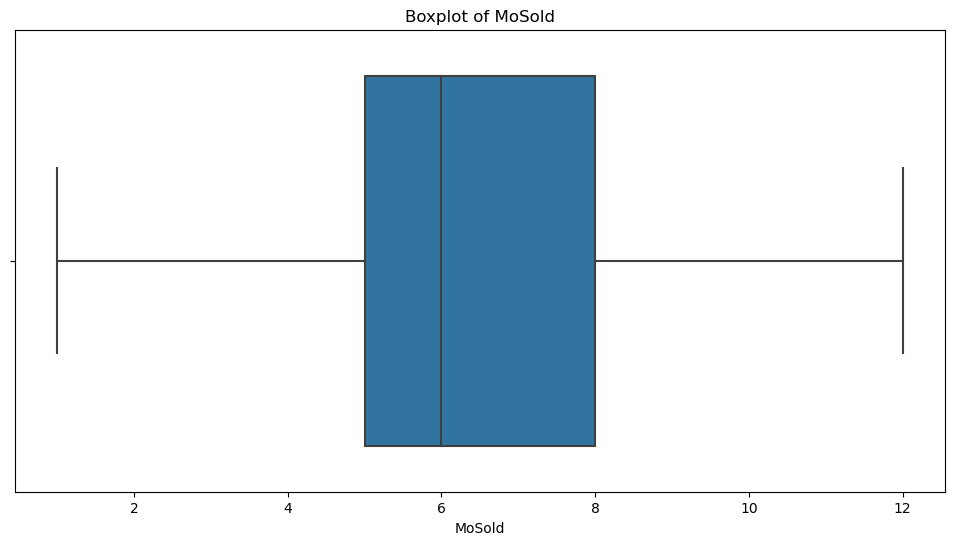

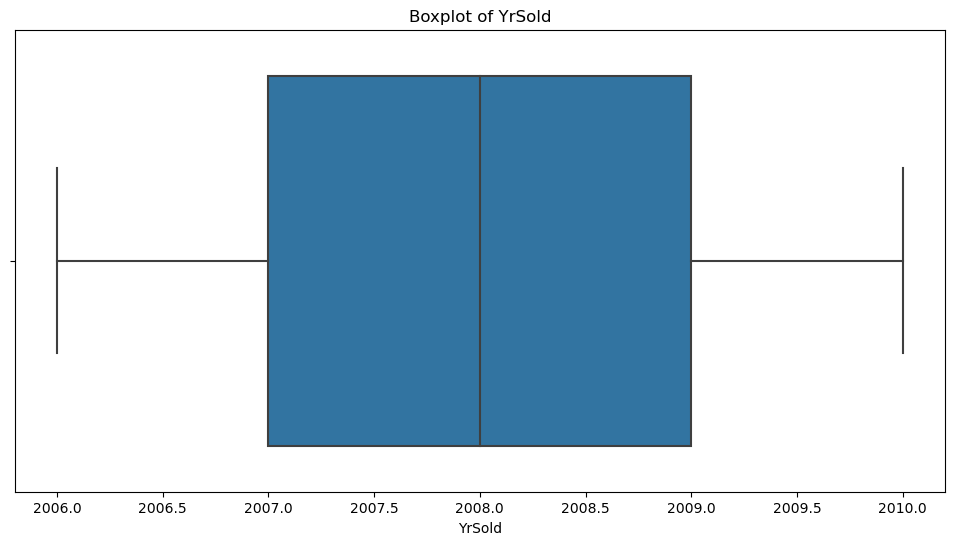

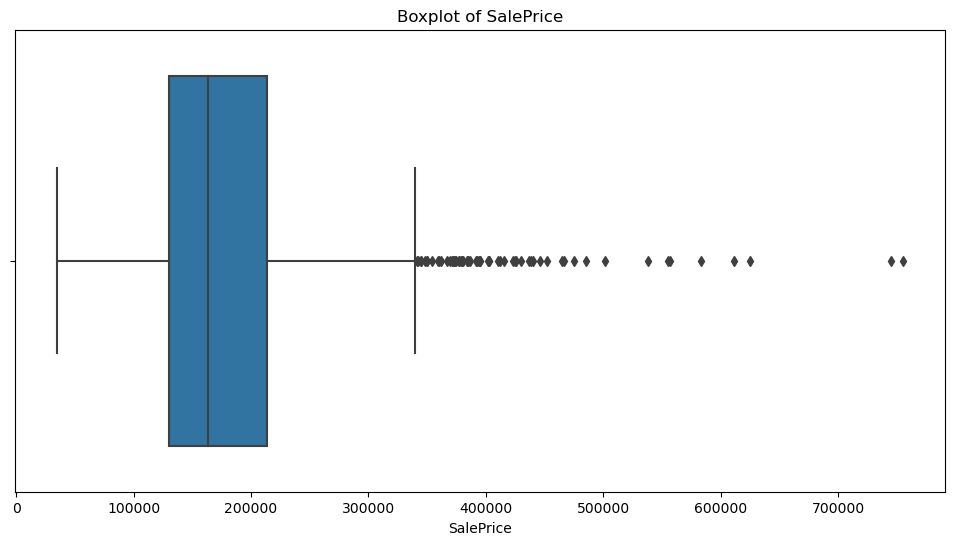

In [22]:
def plot_boxplots(data2, features):
    for feature in features:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=data2[feature])
        plt.title(f'Boxplot of {feature}')
        plt.show()

numerical_features = data2.select_dtypes(include=['float64', 'int64']).columns
plot_boxplots(data2, numerical_features)

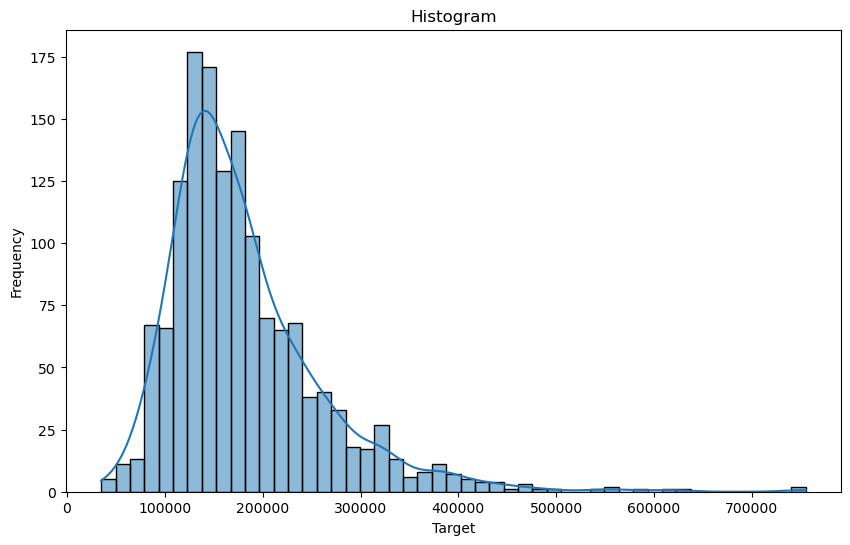

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data2['SalePrice'], kde=True)
plt.title('Histogram')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

The target variable SalePrice exhibits a right-skewed distribution. This indicates that most house prices are concentrated in the lower to mid-range, with a few instances of very high-priced properties extending the tail to the right. This skewness suggests that while there are many houses with lower prices, there are also some properties that are significantly more expensive, creating a long tail of high values

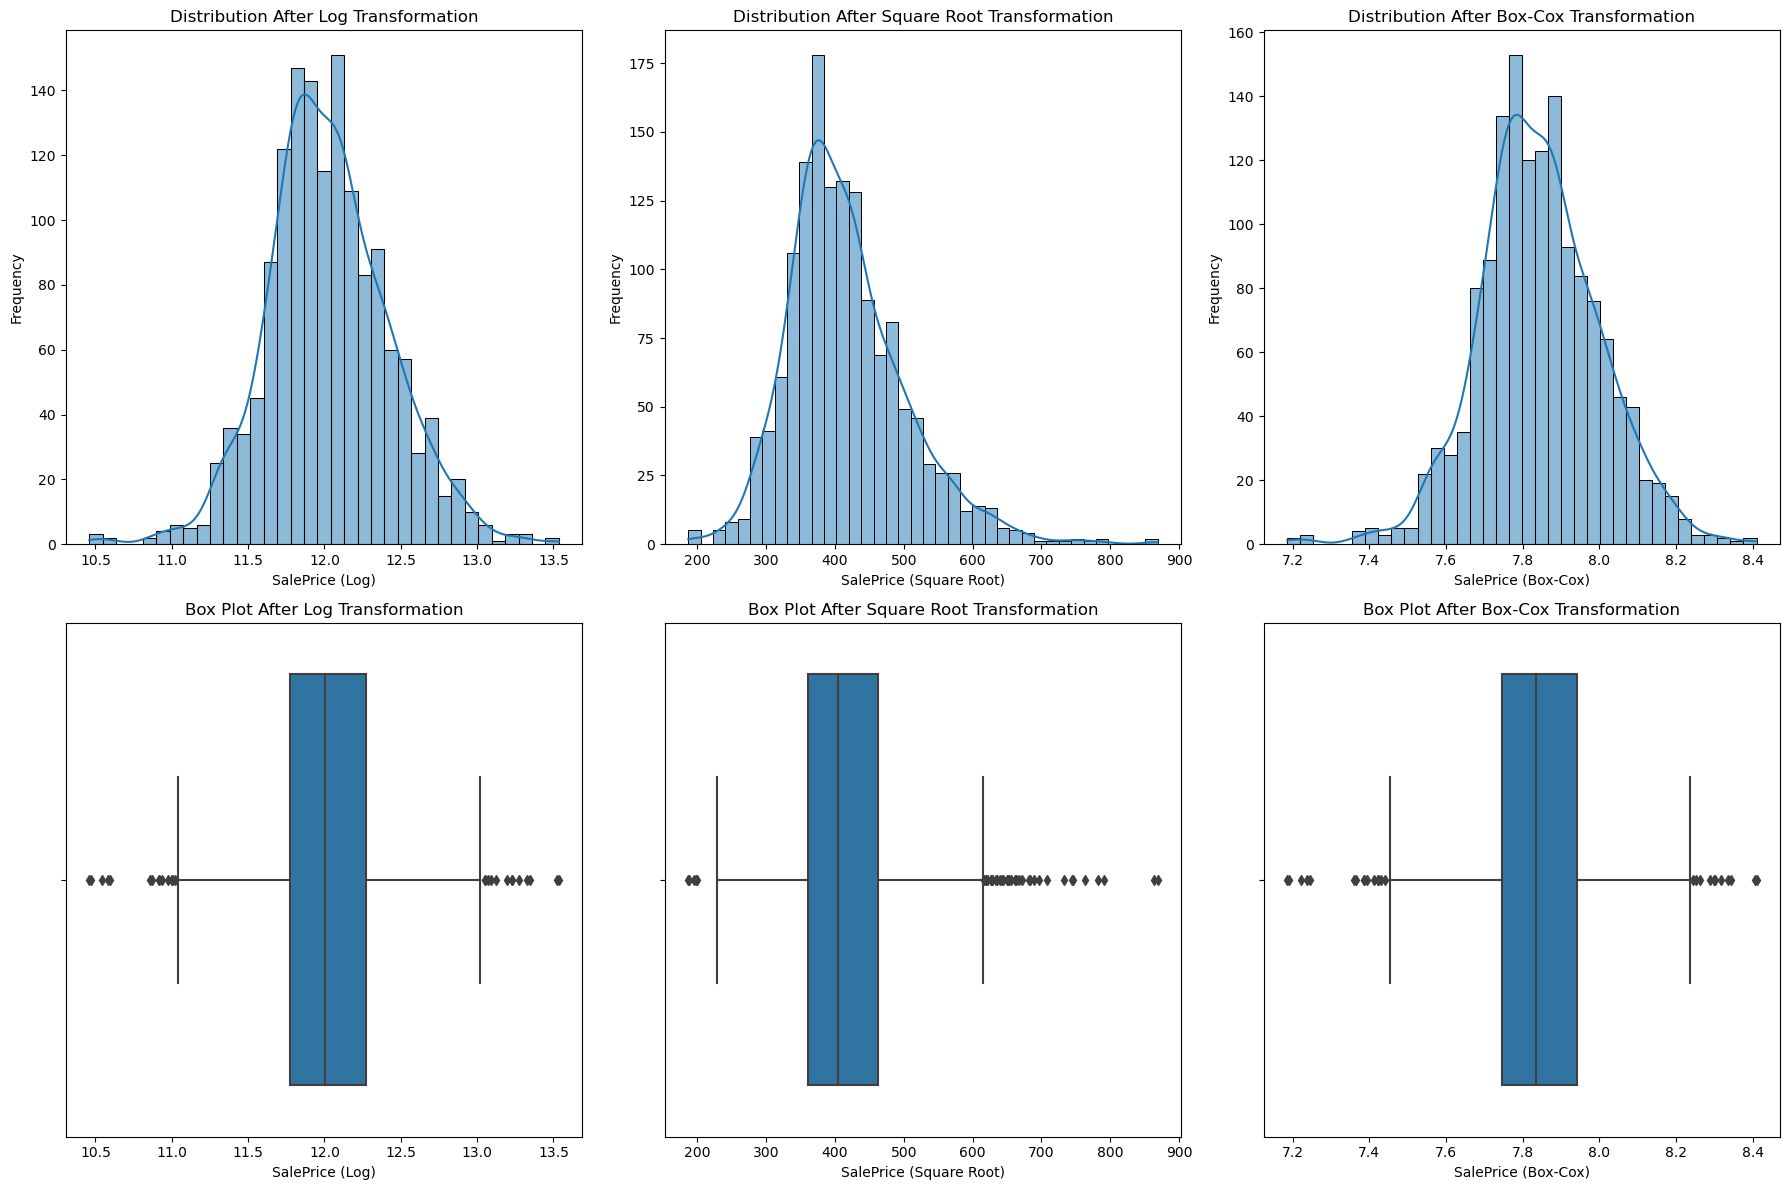

In [24]:
from scipy import stats

data2['SalePrice'].fillna(data2['SalePrice'].median(), inplace=True)

# Log Transformation
data2['SalePrice_log'] = np.log1p(data2['SalePrice'])

# Square Root Transformation
data2['SalePrice_sqrt'] = np.sqrt(data2['SalePrice'])

# Box-Cox Transformation (adding 1 to avoid log(0))
data2['SalePrice_boxcox'], _ = stats.boxcox(data2['SalePrice'] + 1)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Histogram After Log Transformation
sns.histplot(data2['SalePrice_log'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution After Log Transformation')
axes[0, 0].set_xlabel('SalePrice (Log)')
axes[0, 0].set_ylabel('Frequency')

# Histogram After Square Root Transformation
sns.histplot(data2['SalePrice_sqrt'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution After Square Root Transformation')
axes[0, 1].set_xlabel('SalePrice (Square Root)')
axes[0, 1].set_ylabel('Frequency')

# Histogram After Box-Cox Transformation
sns.histplot(data2['SalePrice_boxcox'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution After Box-Cox Transformation')
axes[0, 2].set_xlabel('SalePrice (Box-Cox)')
axes[0, 2].set_ylabel('Frequency')

# Box Plot After Log Transformation
sns.boxplot(x=data2['SalePrice_log'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot After Log Transformation')
axes[1, 0].set_xlabel('SalePrice (Log)')

# Box Plot After Square Root Transformation
sns.boxplot(x=data2['SalePrice_sqrt'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot After Square Root Transformation')
axes[1, 1].set_xlabel('SalePrice (Square Root)')

# Box Plot After Boxcox Transformation
sns.boxplot(x=data2['SalePrice_boxcox'], ax=axes[1, 2])
axes[1, 2].set_title('Box Plot After Box-Cox Transformation')
axes[1, 2].set_xlabel('SalePrice (Box-Cox)')

plt.tight_layout()
plt.show()

In [25]:
def normality_test(series):
    stat, p_value = stats.shapiro(series.dropna())
    return stat, p_value

original_shapiro = normality_test(data2['SalePrice'])
print(f"Original SalePrice - Shapiro-Wilk Test Statistic: {original_shapiro[0]}, p-value: {original_shapiro[1]}")

log_shapiro = normality_test(data2['SalePrice_log'])
sqrt_shapiro = normality_test(data2['SalePrice_sqrt'])
boxcox_shapiro = normality_test(data2['SalePrice_boxcox'])

print(f"Log Transformed - Shapiro-Wilk Test Statistic: {log_shapiro[0]}, p-value: {log_shapiro[1]}")
print(f"Square Root Transformed - Shapiro-Wilk Test Statistic: {sqrt_shapiro[0]}, p-value: {sqrt_shapiro[1]}")
print(f"Box-Cox Transformed - Shapiro-Wilk Test Statistic: {boxcox_shapiro[0]}, p-value: {boxcox_shapiro[1]}")

Original SalePrice - Shapiro-Wilk Test Statistic: 0.869672954082489, p-value: 3.2072044604461286e-33
Log Transformed - Shapiro-Wilk Test Statistic: 0.9912075400352478, p-value: 1.1504476304935451e-07
Square Root Transformed - Shapiro-Wilk Test Statistic: 0.9554811120033264, p-value: 1.1143801446121397e-20
Box-Cox Transformed - Shapiro-Wilk Test Statistic: 0.9915342926979065, p-value: 1.906980031662897e-07


In [26]:
data2

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... WoodDeckSF OpenPorchSF MoSold  \
0            Lvl    AllPub    Inside  ...      171.0        61.0      2   
1            Lvl    AllPub       FR2  ...      298.0        63.0      5   
2            Lvl    AllPub    Inside  ...      171.0        42.0      9   
3            Lvl    AllPub    Corner  ...      171.0        35.0      2   
4            Lvl    AllPub       FR2  ...      192.0        84.0     12   
...          ...       ...       ...  ...        ...         ...    ...   
1455         Lvl    AllPub    Inside  ...      171.0        40.0      8   
1456         Lvl    AllPub    Inside  ...      349.0        63.0      2   
1457         Lvl    AllPub    Inside  ...      171.0        60.0      5   
1458         Lvl    AllPub    Inside  ...      366.0        63.0      4   
1459         Lvl    AllPub    Inside  ...      736.0        68.0      6   

     YrSold SaleType SaleCondition  SalePrice  SalePrice_log  SalePrice_sqrt  \
0      2008       WD        Normal     208500      12.247699      456.618002   
1      2007       WD        Normal     181500      12.109016      426.028168   
2      2008       WD        Normal     223500      12.317171      472.757866   
3      2006       WD       Abnorml     140000      11.849405      374.165739   
4      2008       WD        Normal     250000      12.429220      500.000000   
...     ...      ...           ...        ...            ...             ...   
1455   2007       WD        Normal     175000      12.072547      418.330013   
1456   2010       WD        Normal     210000      12.254868      458.257569   
1457   2010       WD        Normal     266500      12.493133      516.236380   
1458   2010       WD        Normal     142125      11.864469      376.994695   
1459   2008       WD        Normal     147500      11.901590      384.057287   

      SalePrice_boxcox  
0             7.932275  
1             7.877933  
2             7.959279  
3             7.774635  
4             8.002531  
...                ...  
1455          7.863547  
1456          7.935068  
1457          8.027036  
1458          7.780686  
1459          7.795566  

[1460 rows x 71 columns]

# FEATURE ENGINEERING

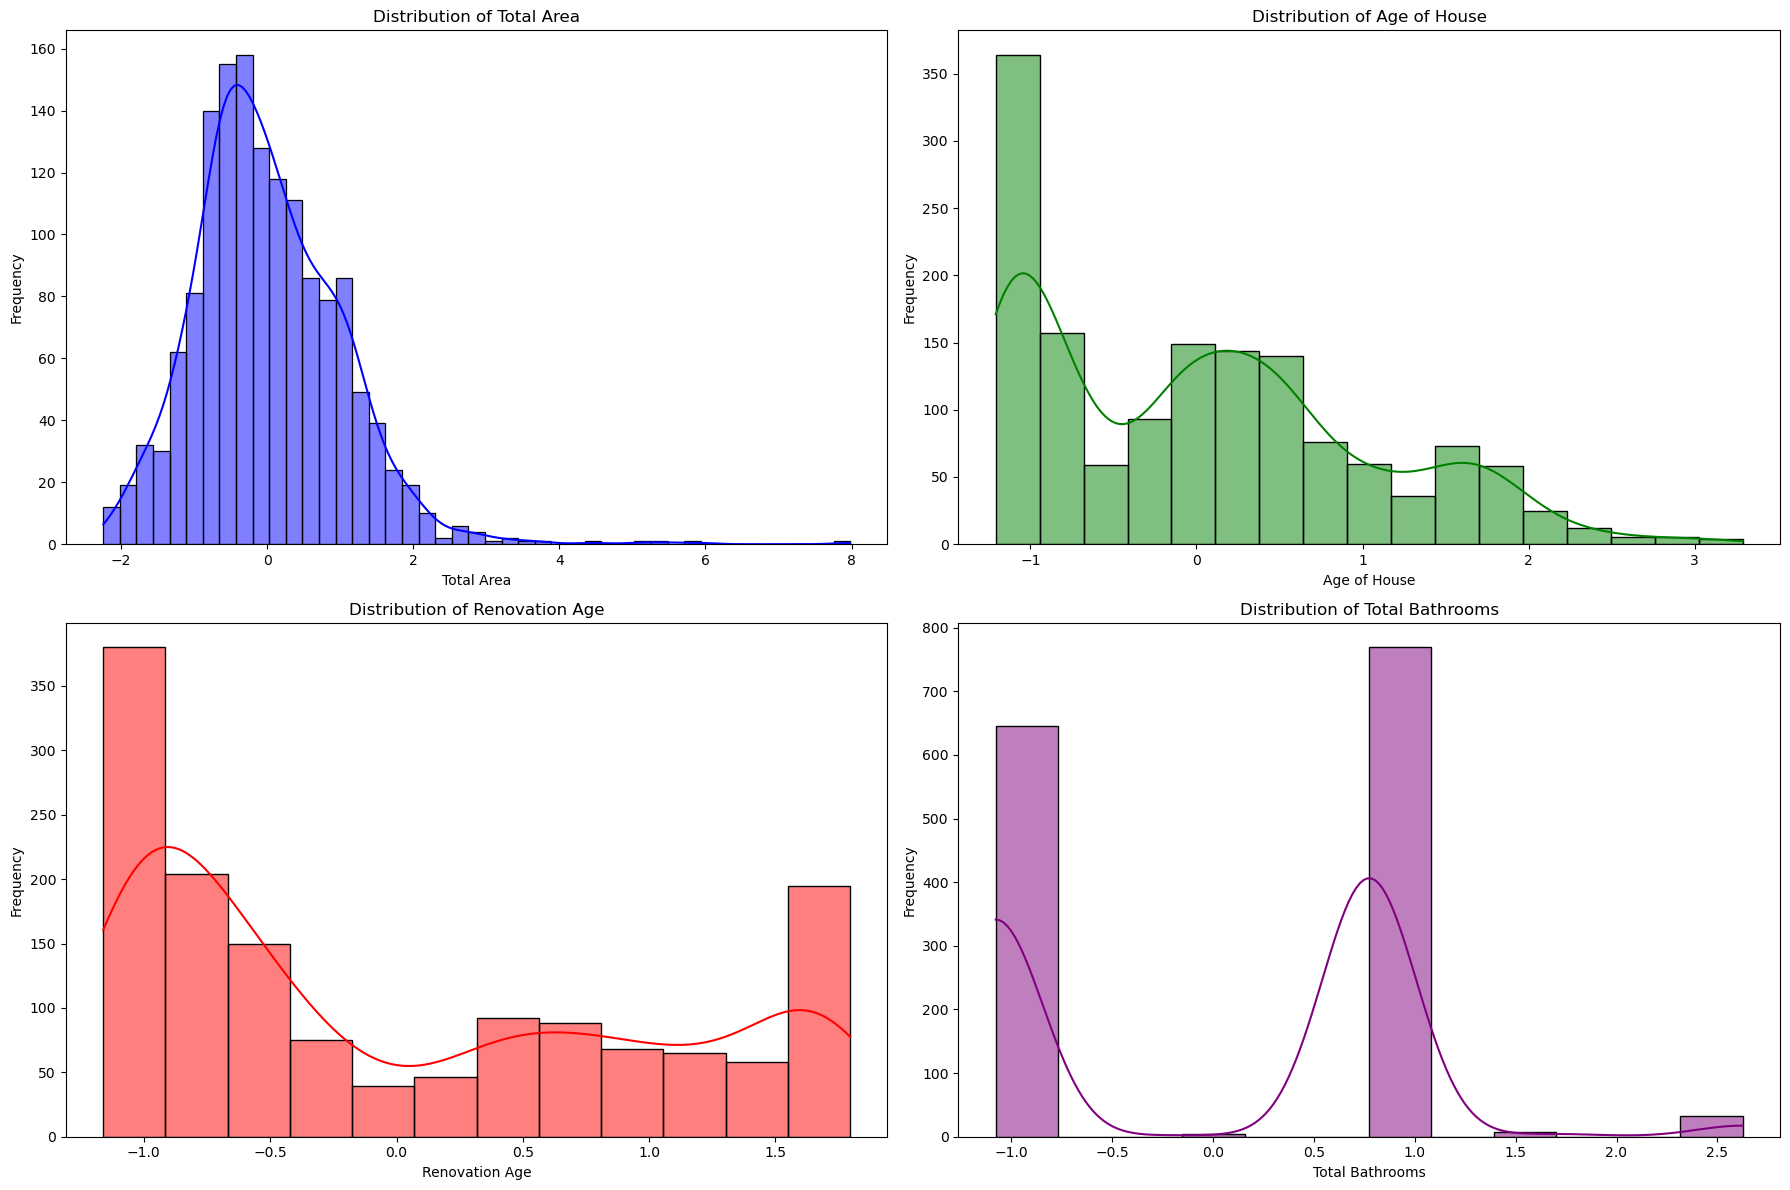

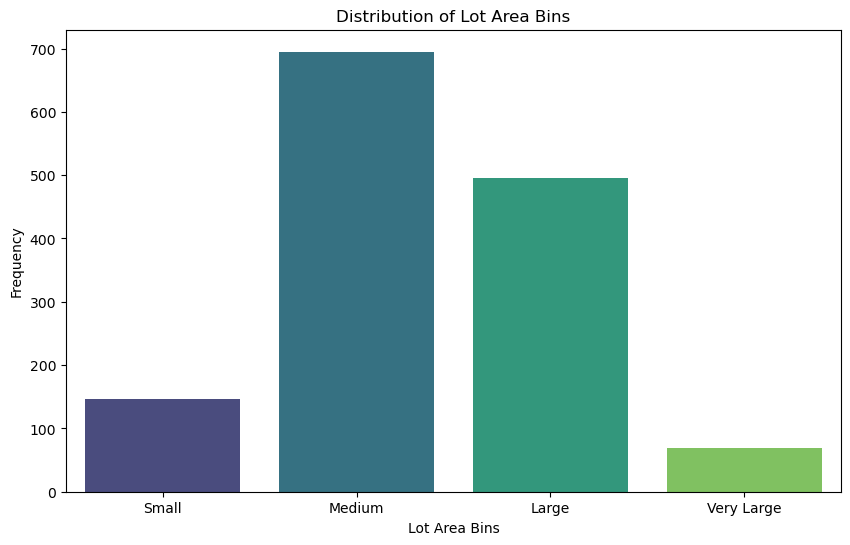

In [27]:
from sklearn.preprocessing import StandardScaler

data2['TotalArea'] = data2['1stFlrSF'] + data2['2ndFlrSF']  # Total area of the house
data2['Age'] = data2['YrSold'] - data2['YearBuilt']  # Age of the house
data2['RenovationAge'] = data2['YrSold'] - data2['YearRemodAdd']  # Age since renovation

data2['TotalBath'] = data2['FullBath'] + 0.5 * data2['HalfBath']  # Total number of bathrooms

data2['LotArea_bins'] = pd.cut(data2['LotArea'], bins=[0, 5000, 10000, 15000, 20000], labels=['Small', 'Medium', 'Large', 'Very Large'])

features_to_scale = ['TotalArea', 'Age', 'RenovationAge', 'TotalBath']
scaler = StandardScaler()
data2[features_to_scale] = scaler.fit_transform(data2[features_to_scale])


plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.histplot(data2['TotalArea'], kde=True, color='blue')
plt.title('Distribution of Total Area')
plt.xlabel('Total Area')
plt.ylabel('Frequency')

# Plot Age of House
plt.subplot(2, 2, 2)
sns.histplot(data2['Age'], kde=True, color='green')
plt.title('Distribution of Age of House')
plt.xlabel('Age of House')
plt.ylabel('Frequency')

# Plot Renovation Age
plt.subplot(2, 2, 3)
sns.histplot(data2['RenovationAge'], kde=True, color='red')
plt.title('Distribution of Renovation Age')
plt.xlabel('Renovation Age')
plt.ylabel('Frequency')

# Plot Total Bathrooms
plt.subplot(2, 2, 4)
sns.histplot(data2['TotalBath'], kde=True, color='purple')
plt.title('Distribution of Total Bathrooms')
plt.xlabel('Total Bathrooms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=data2, x='LotArea_bins', palette='viridis')
plt.title('Distribution of Lot Area Bins')
plt.xlabel('Lot Area Bins')
plt.ylabel('Frequency')
plt.show()

# ENCODING

In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Id                1460 non-null   int64   
 1   MSSubClass        1460 non-null   int64   
 2   MSZoning          1460 non-null   object  
 3   LotFrontage       1460 non-null   float64 
 4   LotArea           1460 non-null   int64   
 5   Street            1460 non-null   object  
 6   LotShape          1460 non-null   object  
 7   LandContour       1460 non-null   object  
 8   Utilities         1460 non-null   object  
 9   LotConfig         1460 non-null   object  
 10  LandSlope         1460 non-null   object  
 11  Neighborhood      1460 non-null   object  
 12  Condition1        1460 non-null   object  
 13  Condition2        1460 non-null   object  
 14  BldgType          1460 non-null   object  
 15  HouseStyle        1460 non-null   object  
 16  OverallQual       1460 n

In [29]:
categorical_features = data2.select_dtypes(include=['object']).columns

print(categorical_features)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

categorical_features = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
    'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition'
]

ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                    'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional',
                    'FireplaceQu', 'GarageQual', 'GarageCond']

nominal_features = [f for f in categorical_features if f not in ordinal_features]

label_encoders = {feature: LabelEncoder() for feature in ordinal_features}

for feature in ordinal_features:
    data2[feature] = label_encoders[feature].fit_transform(data2[feature].astype(str))

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

one_hot_encoded = one_hot_encoder.fit_transform(data2[nominal_features])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(nominal_features))

data2_encoded = data2.drop(columns=categorical_features)
data2_encoded = pd.concat([data2_encoded, one_hot_encoded_df], axis=1)

print(data2_encoded.head())
print("\nData Types after encoding:\n", data2_encoded.dtypes)

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0          2  ...             0.0             0.0   
1          1976       203.0          3  ...             0.0             0.0   
2          2002       162.0          2  ...             0.0             0.0   
3          1970       203.0          3  ...             0.0             0.0   
4          2000       350.0          2  ...             0.0             0.0   

   SaleType_New  SaleType_Oth  SaleType_WD  

In [31]:
object_columns_after_encoding = data2_encoded.select_dtypes(include=['object']).columns
print("Columns with dtype 'object' after encoding:", object_columns_after_encoding)

Columns with dtype 'object' after encoding: Index([], dtype='object')


In [32]:
data2_encoded[object_columns_after_encoding] = data2_encoded[object_columns_after_encoding].apply(pd.to_numeric, errors='coerce')


In [33]:
categorical_columns = data2_encoded.select_dtypes(include=['category']).columns
print("Columns with dtype 'category':", categorical_columns)

Columns with dtype 'category': Index(['LotArea_bins'], dtype='object')


In [34]:
data2_encoded['LotArea_bins'] = data2_encoded['LotArea_bins'].cat.codes

In [35]:
print(data2_encoded.isna().sum())

data2_encoded.fillna(data2_encoded.mean(), inplace=True)

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 197, dtype: int64


In [36]:
data2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 197 entries, Id to SaleCondition_Partial
dtypes: float64(170), int32(13), int64(13), int8(1)
memory usage: 2.1 MB


# MODELING

Lambda for Box-Cox transform: -0.07692391328663316

Training and evaluating Linear Regression with log transformation...



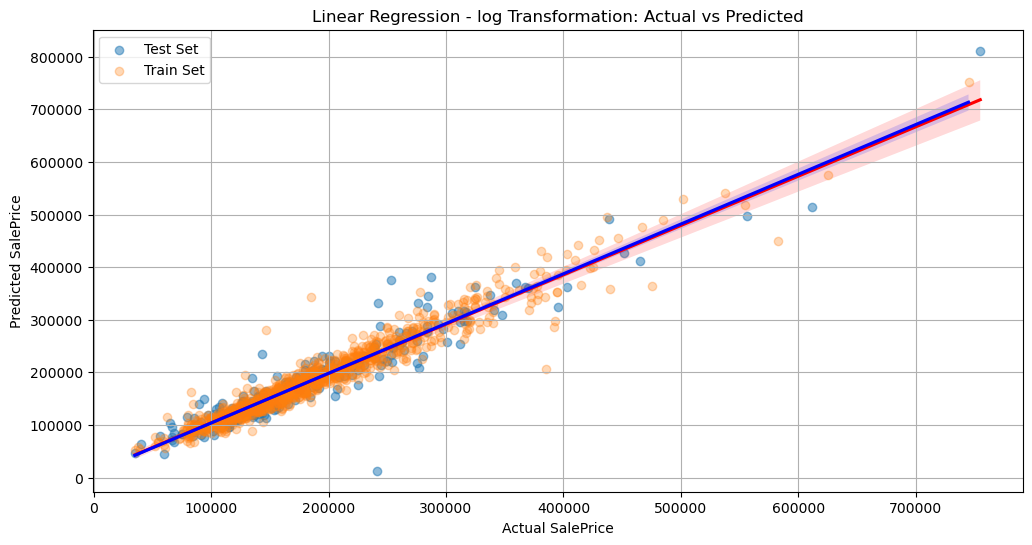


Training and evaluating Linear Regression with sqrt transformation...



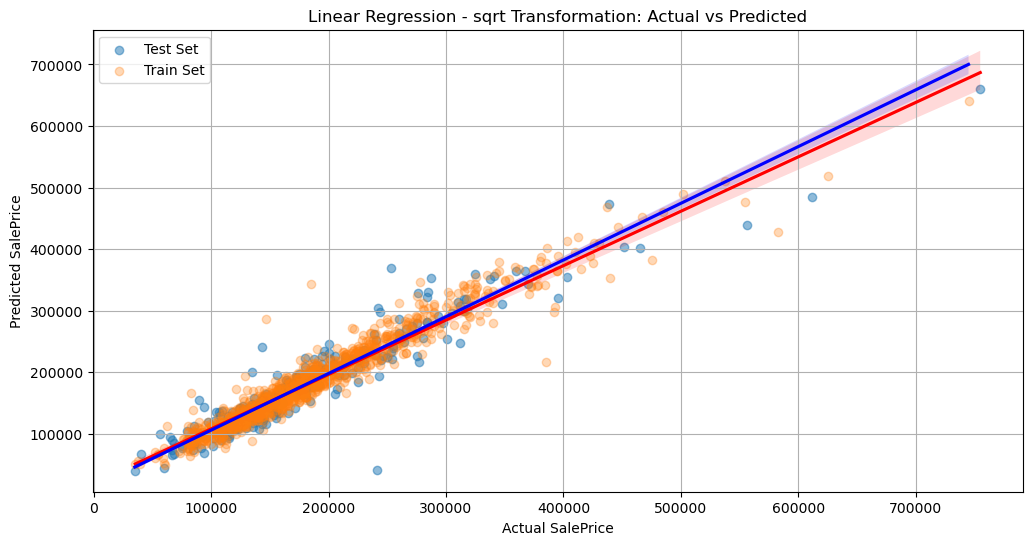


Training and evaluating Linear Regression with boxcox transformation...



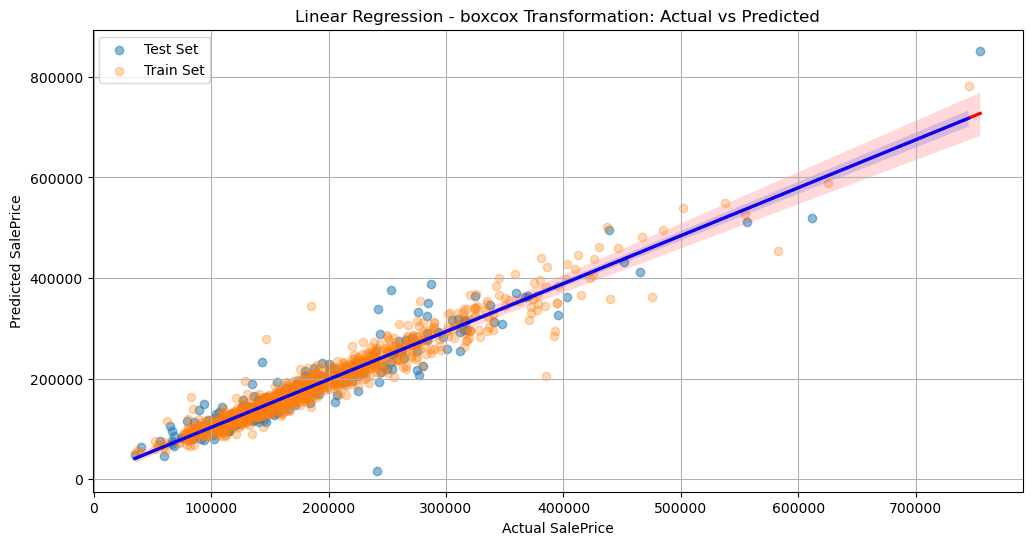


Training and evaluating Random Forest with log transformation...



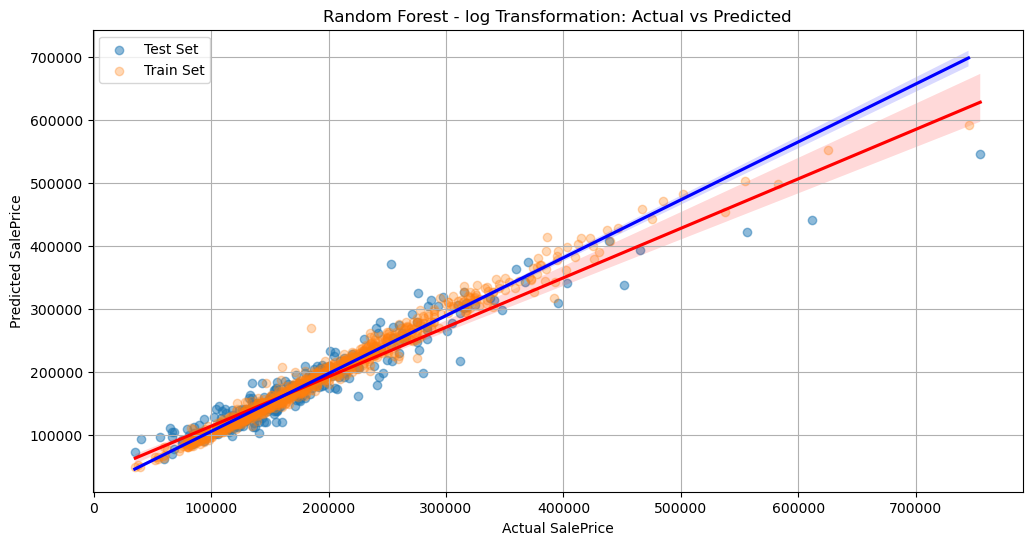


Training and evaluating Random Forest with sqrt transformation...



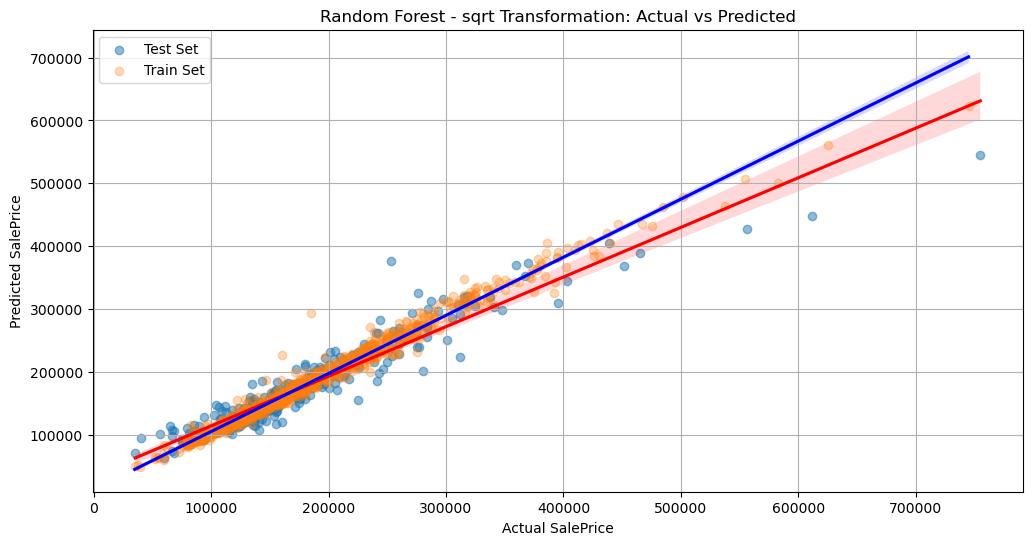


Training and evaluating Random Forest with boxcox transformation...



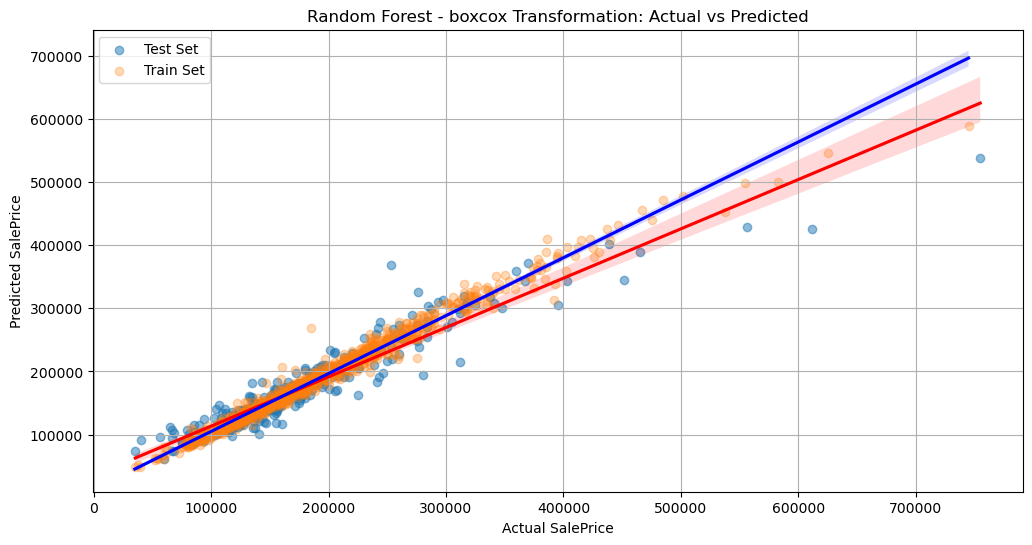


Training and evaluating XGBoost with log transformation...



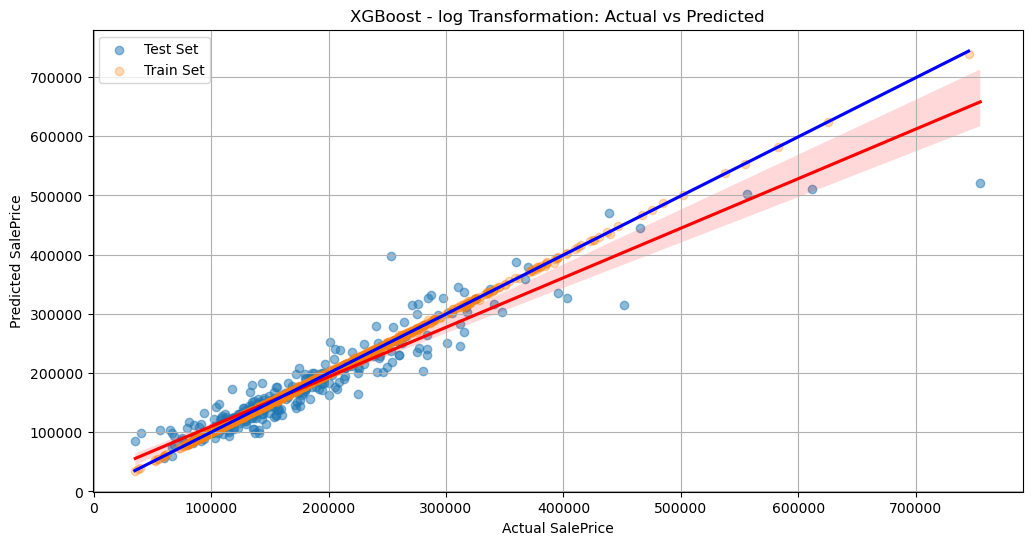


Training and evaluating XGBoost with sqrt transformation...



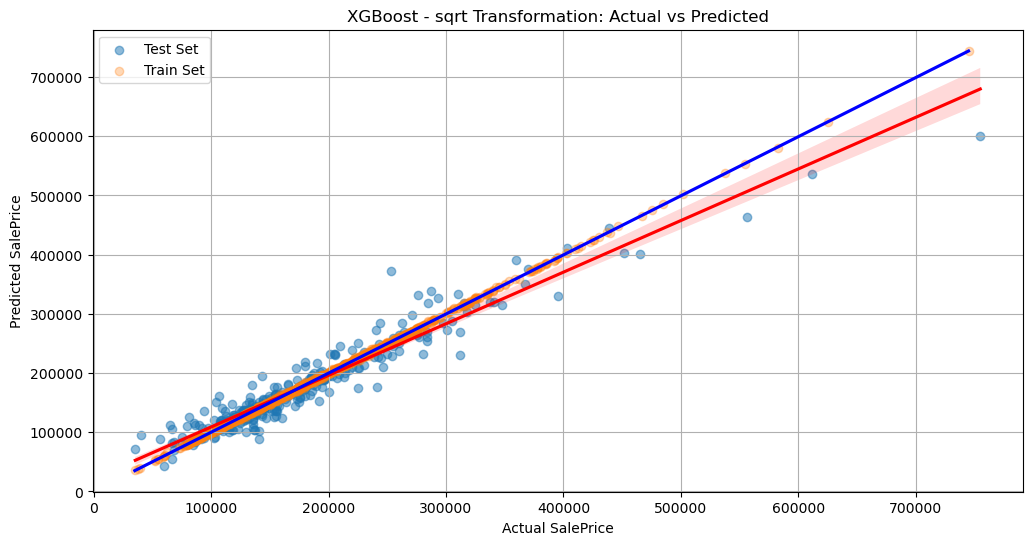


Training and evaluating XGBoost with boxcox transformation...



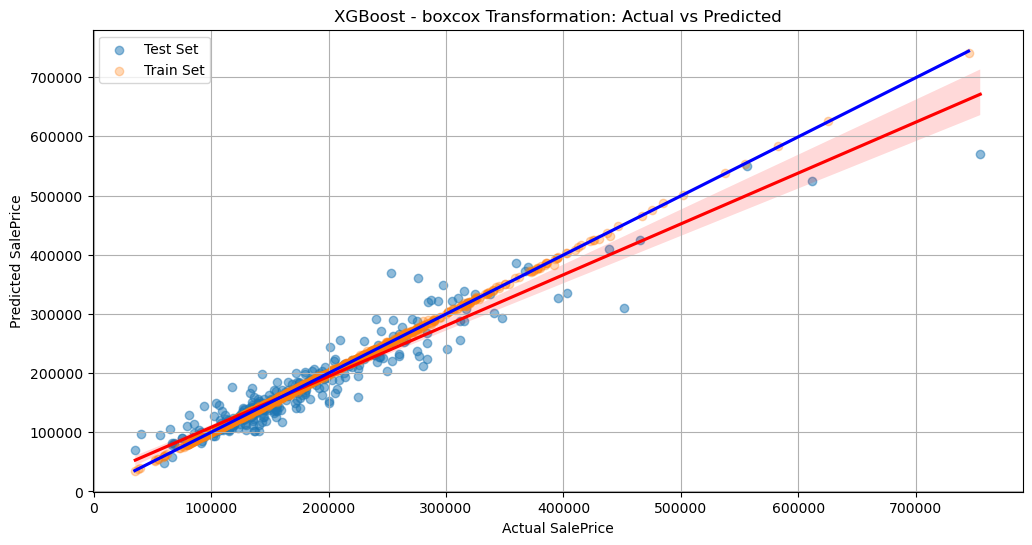

                Model Transformation    Set  Mean Squared Error  \
0   Linear Regression            log  Train        3.597638e+08   
1   Linear Regression            log   Test        7.548090e+08   
2   Linear Regression           sqrt  Train        3.709778e+08   
3   Linear Regression           sqrt   Test        7.758948e+08   
4   Linear Regression         boxcox  Train        3.699477e+08   
5   Linear Regression         boxcox   Test        7.770600e+08   
6       Random Forest            log  Train        1.362846e+08   
7       Random Forest            log   Test        8.620025e+08   
8       Random Forest           sqrt  Train        1.283696e+08   
9       Random Forest           sqrt   Test        8.265263e+08   
10      Random Forest         boxcox  Train        1.386341e+08   
11      Random Forest         boxcox   Test        8.768434e+08   
12            XGBoost            log  Train        1.411448e+06   
13            XGBoost            log   Test        8.425005e+0

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.special import inv_boxcox
from scipy import stats
from sklearn.model_selection import train_test_split

y = data2['SalePrice']

y_boxcox, lambda_boxcox = stats.boxcox(y)
print(f"Lambda for Box-Cox transform: {lambda_boxcox}")

X = data2_encoded.drop(columns=['SalePrice', 'SalePrice_log', 'SalePrice_sqrt', 'SalePrice_boxcox'])
y_log = data2['SalePrice_log']
y_sqrt = data2['SalePrice_sqrt']
y_boxcox = pd.Series(y_boxcox, index=data2.index)

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
X_train, X_test, y_train_sqrt, y_test_sqrt = train_test_split(X, y_sqrt, test_size=0.2, random_state=42)
X_train, X_test, y_train_boxcox, y_test_boxcox = train_test_split(X, y_boxcox, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

results = []

for model_name, model in models.items():
    for transform_name in ['log', 'sqrt', 'boxcox']:
        print(f"\nTraining and evaluating {model_name} with {transform_name} transformation...\n")

        model.fit(X_train, y_train_log if transform_name == 'log' else y_train_sqrt if transform_name == 'sqrt' else y_train_boxcox)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Inverse transform predictions
        if transform_name == 'log':
            y_train_pred_original = np.exp(y_train_pred)
            y_test_pred_original = np.exp(y_test_pred)
            y_train_original = np.exp(y_train_log)
            y_test_original = np.exp(y_test_log)
        elif transform_name == 'sqrt':
            y_train_pred_original = y_train_pred ** 2
            y_test_pred_original = y_test_pred ** 2
            y_train_original = y_train_sqrt ** 2
            y_test_original = y_test_sqrt ** 2
        elif transform_name == 'boxcox':
            y_train_pred_original = inv_boxcox(y_train_pred, lambda_boxcox)
            y_test_pred_original = inv_boxcox(y_test_pred, lambda_boxcox)
            y_train_original = inv_boxcox(y_train_boxcox, lambda_boxcox)
            y_test_original = inv_boxcox(y_test_boxcox, lambda_boxcox)

        # Calculate metrics for train set
        mse_train = mean_squared_error(y_train_original, y_train_pred_original)
        rmse_train = np.sqrt(mse_train)
        mape_train = np.mean(np.abs((y_train_original - y_train_pred_original) / y_train_original)) * 100
        accuracy_train = 100 - mape_train
        r2_train = r2_score(y_train_original, y_train_pred_original)

        # Calculate metrics for test set
        mse_test = mean_squared_error(y_test_original, y_test_pred_original)
        rmse_test = np.sqrt(mse_test)
        mape_test = np.mean(np.abs((y_test_original - y_test_pred_original) / y_test_original)) * 100
        accuracy_test = 100 - mape_test
        r2_test = r2_score(y_test_original, y_test_pred_original)

        results.append({
            'Model': model_name,
            'Transformation': transform_name,
            'Set': 'Train',
            'Mean Squared Error': mse_train,
            'Root Mean Squared Error': rmse_train,
            'Mean Absolute Percentage Error': mape_train,
            'Accuracy': accuracy_train,
            'R^2 Score': r2_train
        })

        results.append({
            'Model': model_name,
            'Transformation': transform_name,
            'Set': 'Test',
            'Mean Squared Error': mse_test,
            'Root Mean Squared Error': rmse_test,
            'Mean Absolute Percentage Error': mape_test,
            'Accuracy': accuracy_test,
            'R^2 Score': r2_test
        })

        plt.figure(figsize=(12, 6))

        sns.regplot(x=y_test_original, y=y_test_pred_original, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, label='Test Set')

        sns.regplot(x=y_train_original, y=y_train_pred_original, scatter_kws={'alpha':0.3}, line_kws={'color':'blue'}, label='Train Set')

        plt.xlabel('Actual SalePrice')
        plt.ylabel('Predicted SalePrice')
        plt.title(f'{model_name} - {transform_name} Transformation: Actual vs Predicted')
        plt.legend()
        plt.grid(True)
        plt.show()

results_df = pd.DataFrame(results)

print(results_df)

In [39]:
def highlight_best(df):
    df = df.copy()
    best_train_rmse = df[df['Set'] == 'Train']['Root Mean Squared Error'].min()
    best_test_rmse = df[df['Set'] == 'Test']['Root Mean Squared Error'].min()

    def highlight(x):
        if x.name == 'Root Mean Squared Error':
            return ['background-color: yellow' if v == best_train_rmse else '' for v in x]
        if x.name == 'Set':
            return ['background-color: lightblue' if v == 'Test' else '' for v in x]
        return [''] * len(x)

    return df.style.apply(highlight, axis=1)

styled_df = highlight_best(results_df)
styled_df

- XGBoost with Log and Sqrt transformations performs exceptionally well in both training and test sets, showing the lowest RMSE and high R^2 scores. This model is likely the best choice for predicting house prices based on the metrics provided.

- Random Forest provides competitive performance but shows higher MSE and RMSE on the test set compared to XGBoost.

- Linear Regression is less effective compared to the other models, particularly in terms of RMSE and R^2 scores.

# HYPERPARAMETER TUNING

In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

ridge = Ridge(random_state=42)

grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [41]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid_lasso = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

lasso = Lasso(random_state=42)

grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
models['Random Forest'] = grid_search_rf

In [43]:
param_dist_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

random_search_xgb = RandomizedSearchCV(estimator=XGBRegressor(random_state=42), param_distributions=param_dist_xgb, n_iter=50, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
models['XGBoost'] = random_search_xgb


Fitting Ridge Regression...



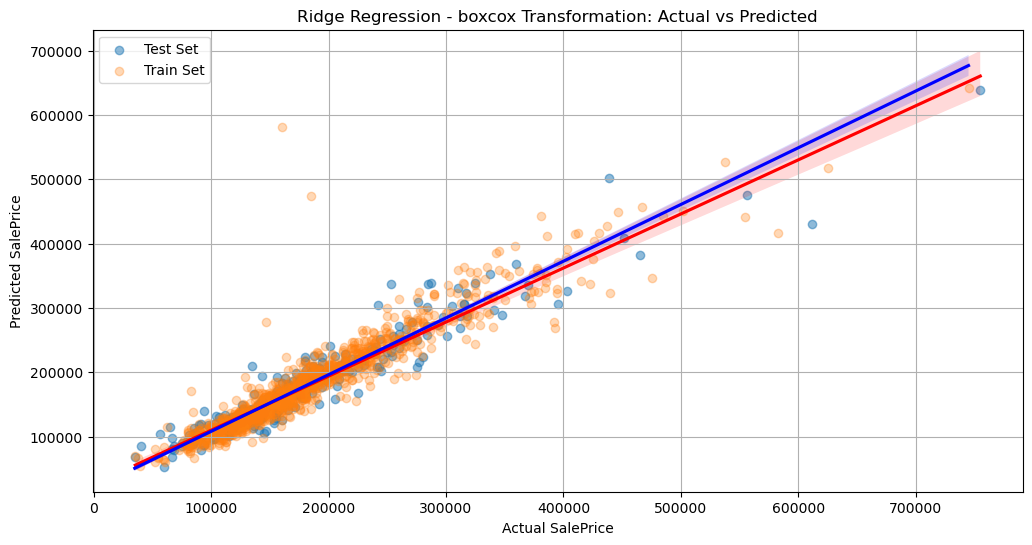


Fitting Lasso Regression...



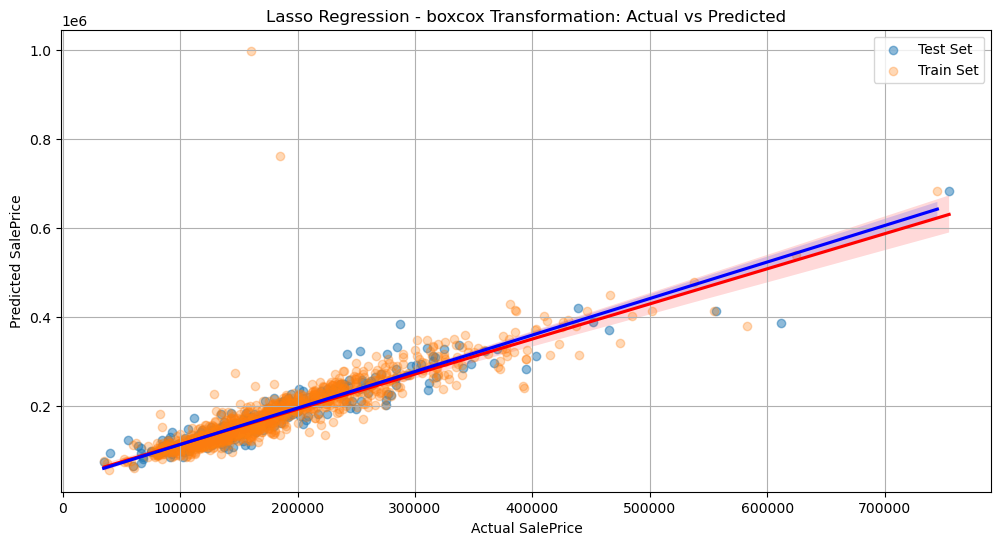


Fitting Random Forest...



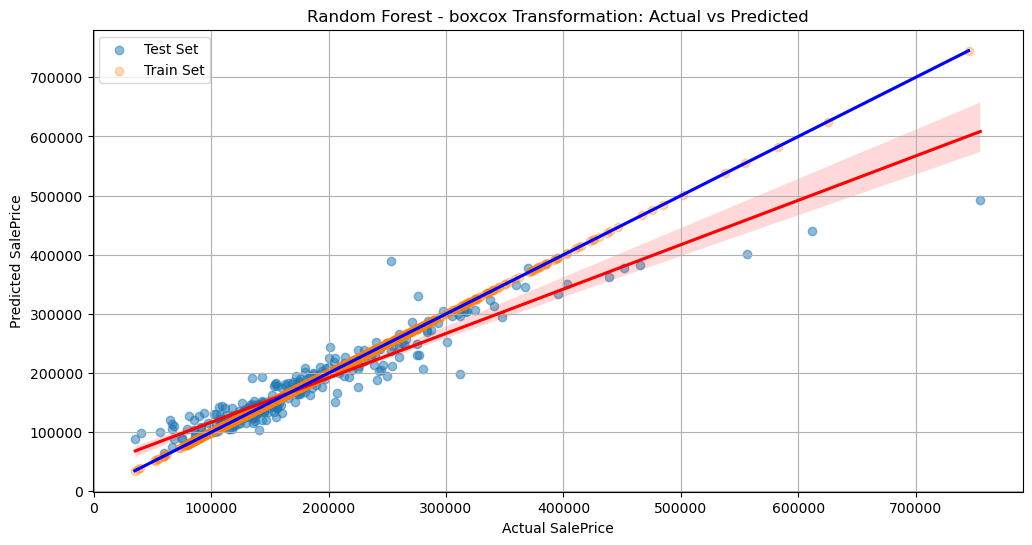


Fitting XGBoost...

Fitting 5 folds for each of 50 candidates, totalling 250 fits


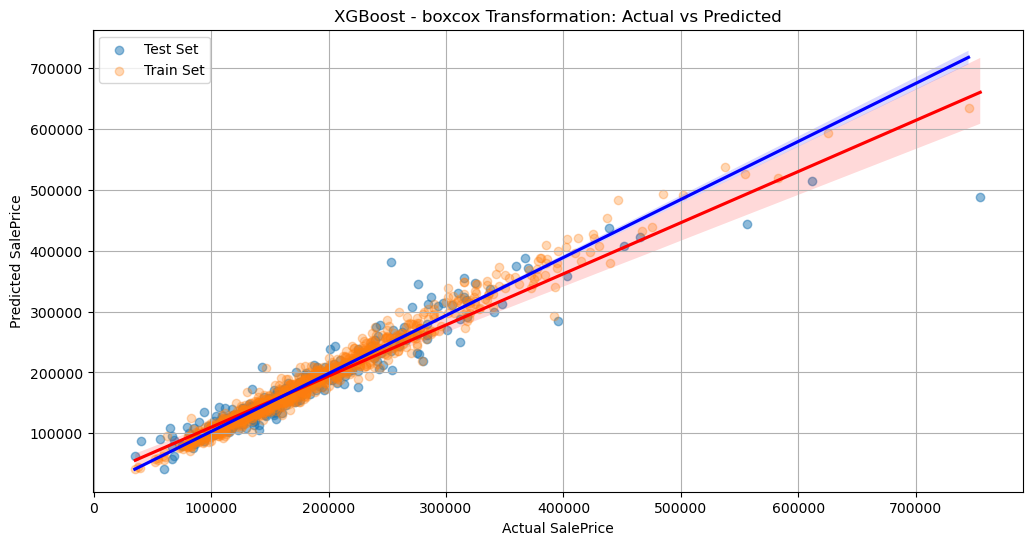

In [44]:
models = {
    'Ridge Regression': grid_search_ridge,
    'Lasso Regression': grid_search_lasso,
    'Random Forest': grid_search_rf,
    'XGBoost': random_search_xgb
}

results = []

for model_name, model in models.items():
    print(f"\nFitting {model_name}...\n")

    model.fit(X_train, y_train_log if model_name in ['Ridge Regression', 'Lasso Regression'] else y_train_sqrt if model_name == 'Random Forest' else y_train_boxcox)

    if model_name in ['Ridge Regression', 'Lasso Regression', 'Random Forest', 'XGBoost']:
        model = model.best_estimator_

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    if model_name in ['Ridge Regression', 'Lasso Regression']:
        y_train_pred_original = np.exp(y_train_pred)
        y_test_pred_original = np.exp(y_test_pred)
        y_train_original = np.exp(y_train_log)
        y_test_original = np.exp(y_test_log)
    elif model_name == 'Random Forest':
        y_train_pred_original = y_train_pred ** 2
        y_test_pred_original = y_test_pred ** 2
        y_train_original = y_train_sqrt ** 2
        y_test_original = y_test_sqrt ** 2
    elif model_name == 'XGBoost':
        y_train_pred_original = inv_boxcox(y_train_pred, lambda_boxcox)
        y_test_pred_original = inv_boxcox(y_test_pred, lambda_boxcox)
        y_train_original = inv_boxcox(y_train_boxcox, lambda_boxcox)
        y_test_original = inv_boxcox(y_test_boxcox, lambda_boxcox)

    mse_train = mean_squared_error(y_train_original, y_train_pred_original)
    rmse_train = np.sqrt(mse_train)
    mape_train = np.mean(np.abs((y_train_original - y_train_pred_original) / y_train_original)) * 100
    accuracy_train = 100 - mape_train
    r2_train = r2_score(y_train_original, y_train_pred_original)

    mse_test = mean_squared_error(y_test_original, y_test_pred_original)
    rmse_test = np.sqrt(mse_test)
    mape_test = np.mean(np.abs((y_test_original - y_test_pred_original) / y_test_original)) * 100
    accuracy_test = 100 - mape_test
    r2_test = r2_score(y_test_original, y_test_pred_original)

    results.append({
        'Model': model_name,
        'Transformation': 'log' if model_name in ['Ridge Regression', 'Lasso Regression'] else 'sqrt' if model_name == 'Random Forest' else 'boxcox',
        'Set': 'Train',
        'Mean Squared Error': mse_train,
        'Root Mean Squared Error': rmse_train,
        'Mean Absolute Percentage Error': mape_train,
        'Accuracy': accuracy_train,
        'R^2 Score': r2_train
    })

    results.append({
        'Model': model_name,
        'Transformation': 'log' if model_name in ['Ridge Regression', 'Lasso Regression'] else 'sqrt' if model_name == 'Random Forest' else 'boxcox',
        'Set': 'Test',
        'Mean Squared Error': mse_test,
        'Root Mean Squared Error': rmse_test,
        'Mean Absolute Percentage Error': mape_test,
        'Accuracy': accuracy_test,
        'R^2 Score': r2_test
    })

    plt.figure(figsize=(12, 6))

    sns.regplot(x=y_test_original, y=y_test_pred_original, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, label='Test Set')

    sns.regplot(x=y_train_original, y=y_train_pred_original, scatter_kws={'alpha':0.3}, line_kws={'color':'blue'}, label='Train Set')

    plt.xlabel('Actual SalePrice')
    plt.ylabel('Predicted SalePrice')
    plt.title(f'{model_name} - {transform_name} Transformation: Actual vs Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()

results_df = pd.DataFrame(results)

def highlight_best(df):
    df = df.copy()
    best_train_rmse = df[df['Set'] == 'Train']['Root Mean Squared Error'].min()
    best_test_rmse = df[df['Set'] == 'Test']['Root Mean Squared Error'].min()

    def highlight(x):
        if x.name == 'Root Mean Squared Error':
            return ['background-color: yellow' if v == best_train_rmse else '' for v in x]
        if x.name == 'Set':
            return ['background-color: lightblue' if v == 'Test' else '' for v in x]
        return [''] * len(x)

    return df.style.apply(highlight, axis=1)

styled_df = highlight_best(results_df)
styled_df

Best Model:

XGBoost with Box-Cox transformation emerges as the best model overall, providing a good balance between low prediction errors and high R² scores on both training and test sets. It demonstrates effective generalization while maintaining high accuracy.
Model Comparison:

Ridge Regression also performs quite well, especially on the test set, with high R² scores and reasonable RMSE values. It is a strong alternative if you seek simplicity and robustness.

Lasso Regression has the highest errors and the lowest R² scores, making it less effective compared to Ridge and XGBoost.

Random Forest shows signs of overfitting, performing perfectly on the training data but poorly on the test data. While it has high test set R², the large discrepancy between training and test performance suggests it may not be the best choice.

Given the balance of performance and generalization, XGBoost with Box-Cox transformation is recommended as the most effective model for predicting house prices in this context.

# FEATURE IMPORTANCE BEFORE TUNING

Feature Importance from Random Forest:
OverallQual           5.566087e-01
TotalArea             1.092147e-01
GrLivArea             8.737839e-02
2ndFlrSF              2.885335e-02
TotalBsmtSF           2.354159e-02
                          ...     
Condition1_RRNe       9.965420e-09
Exterior1st_CBlock    3.552488e-09
Condition2_RRAn       3.401813e-09
RoofMatl_Roll         6.804788e-10
Utilities_NoSeWa      0.000000e+00
Length: 193, dtype: float64


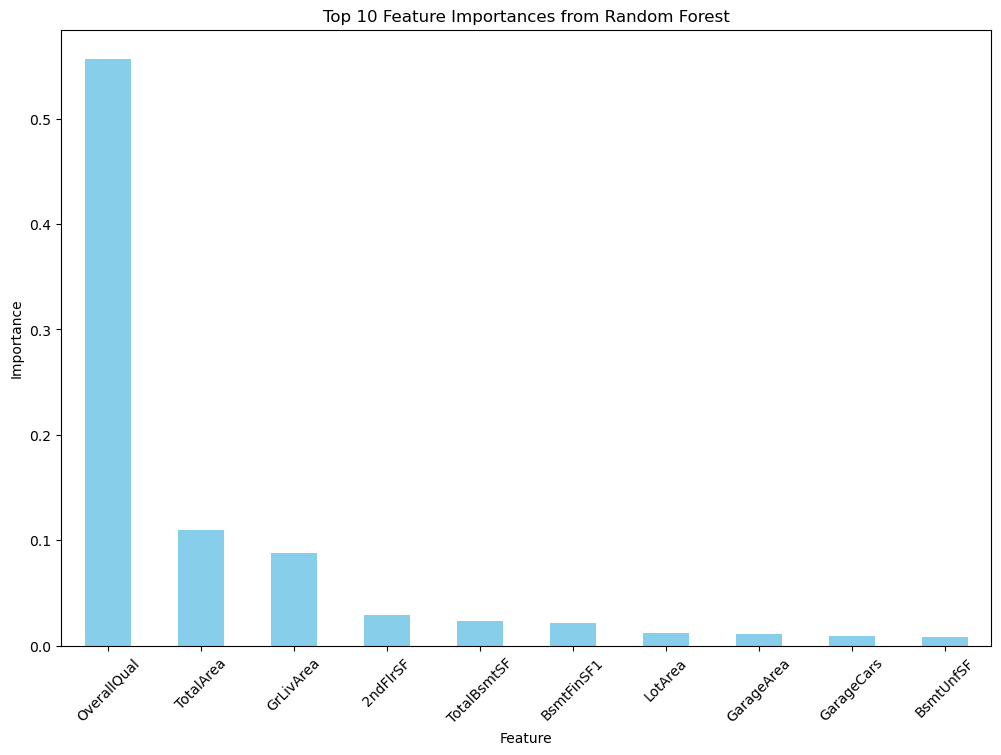

In [47]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print('Feature Importance from Random Forest:')
print(feature_importance)

top_10_features = feature_importance.head(10)

plt.figure(figsize=(12, 8))
top_10_features.plot(kind='bar', color='skyblue')
plt.title('Top 10 Feature Importances from Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

Conclusion
- Overall Quality of the House (OverallQual) is the most determining feature of house price and should be considered seriously when analyzing or predicting house prices. Improving the overall quality of the house directly increases the house price.

- Total Area (TotalArea) is the second most important factor, meaning that the overall size of the house significantly affects the price. This feature indicates that the total area of the house plays a crucial role in determining its price.

- Main Floor Area (GrLivArea) has a smaller impact compared to OverallQual and TotalArea, but it is still important in determining house prices. This suggests that while the size of the main floor area affects the price, its impact is not as significant as the overall quality or total area.

Recommendations
Focus on Quality: When aiming to increase house prices or develop marketing strategies, prioritize the overall quality of the house, as it is the most critical factor.

Consider Size: Both the total area of the house and the main floor area should also be taken into account, as they significantly influence house prices.
